<div style="background: linear-gradient(135deg,rgb(65, 202, 179),rgb(201, 224, 96)); 
        color:rgb(0, 0, 0); 
        width: 100%; 
        height: 60px; 
        text-align: center; 
        font-weight: bold; 
        line-height: 60px; 
        margin: 2 px 0; 
        font-size: 44px; 
        border-radius: 10px; 
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.3);">
    Online Sales Analysis
</div>

> # **Importing Libraries**

In [2]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Statistical analysis
from scipy import stats

# Setting styles for plots
sns.set_theme(style="whitegrid")
%matplotlib inline

#  **1. Initial Data Investigation**

### **1.0 Loading The DataSet**

In [3]:
data = pd.read_csv("Online Sales.csv")

data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,1/1/2024 0:00,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,1/2/2024 0:00,Home Appliances,NaN,1,499.99,499.99,Europe,PayPal
2,10003,1/3/2024 0:00,Clothing,NaN,3,69.99,209.97,Asia,Debit Card
3,10004,1/4/2024 0:00,Books,NaN,NaN,15.99,63.96,North America,Credit Card
4,10005,1/5/2024 0:00,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


### **1.1 Understanding the Data**
- `Shape`: **1155 rows × 9 columns**
- `Numerical Features`: Transaction ID, Total Revenue.
- `Categorical Features`: Date, Product Name, Region, Payment Method.

In [103]:
print(data.shape)
print(data.columns)

(1155, 9)
Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')


### **1.2 Data Types Analysis**
- `Date` → Should be datetime
- `Units Sold` → Should be numeric
- `Unit Price` → Should be numeric

In [104]:
data.dtypes

Transaction ID        int64
Date                 object
Product Category     object
Product Name         object
Units Sold           object
Unit Price           object
Total Revenue       float64
Region               object
Payment Method       object
dtype: object

### **1.3 Initial Content Examination**

In [105]:
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,1/1/2024 0:00,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,1/2/2024 0:00,Home Appliances,NaN,1,499.99,499.99,Europe,PayPal
2,10003,1/3/2024 0:00,Clothing,NaN,3,69.99,209.97,Asia,Debit Card
3,10004,1/4/2024 0:00,Books,NaN,NaN,15.99,63.96,North America,Credit Card
4,10005,1/5/2024 0:00,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1155 non-null   int64  
 1   Date              1155 non-null   object 
 2   Product Category  1155 non-null   object 
 3   Product Name      232 non-null    object 
 4   Units Sold        982 non-null    object 
 5   Unit Price        1155 non-null   object 
 6   Total Revenue     1155 non-null   float64
 7   Region            1134 non-null   object 
 8   Payment Method    983 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 81.3+ KB


### **1.4 Descriptive Statistics (Numerical)**

In [107]:
data.describe(exclude="object")

,Transaction ID,Total Revenue
count,1155.000000,1.155000e+03
mean,10554.246753,1.531362e+04
std,318.133931,9.172878e+04
min,10001.000000,8.600000e-01
25%,10277.500000,5.831000e+01
50%,10555.000000,4.499900e+02
75%,10831.500000,1.209760e+03
max,11100.000000,2.019764e+06


### **1.5 Categorical Variable Exploration**

In [108]:
data.describe(include="object")

,Date,Product Category,Product Name,Units Sold,Unit Price,Region,Payment Method
count,1155,1155,232,982,1155,1134,983
unique,641,6,171,74,777,3,7
top,12/16/2024,Electronics,Bose QuietComfort 35 Headphones,1,1,North America,Credit Card
freq,7,202,5,394,222,384,478


In [109]:
for col in data.select_dtypes(include="object"):
    
    print(f"\n{col} unique values:", data[col].nunique())
    print(data[col].value_counts().head())


Date unique values: 641
Date
12/16/2024    7
5/7/2024      7
2/21/2024     7
11/10/2024    6
5/19/2024     6
Name: count, dtype: int64

Product Category unique values: 6
Product Category
Electronics        202
Sports             193
Clothing           192
Books              192
Beauty Products    190
Name: count, dtype: int64

Product Name unique values: 171
Product Name
Bose QuietComfort 35 Headphones    5
Microsoft Surface Laptop 4         4
1984 by George Orwell              4
On Running Cloud Shoes             4
Gap 1969 Original Fit Jeans        3
Name: count, dtype: int64

Units Sold unique values: 74
Units Sold
1    394
2    262
3    159
4     76
5      9
Name: count, dtype: int64

Unit Price unique values: 777
Unit Price
1         222
49.99       9
299.99      8
29.99       8
10.99       8
Name: count, dtype: int64

Region unique values: 3
Region
North America    384
Europe           379
Asia             371
Name: count, dtype: int64

Payment Method unique values: 7
Payment Me

### **1.6 Data Volume Assessment**
- Number of transactions: **1155**  
- Time period covered: **2024-01-01 → 2025-04-23**  

In [110]:
print("Number of Transactions:", len(data))
print(f"Time period: Calculated Later After Cleaning")

Number of Transactions: 1155
Time period: Calculated Later After Cleaning


> ### **1.7 Initial Observations**
- Dataset has multiple product categories, regions, and payment methods.
- Issues should be fixed:  
  - `Units Sold` and `Unit Price` are object → need conversion to numeric.  
  - `Date` is object → need conversion to numeric.
- Total revenue shows large outliers due to high variance between mean and median.  

#  **2. Data Quality Assessment & Cleaning**

### **2.1 Data Type Validation**

> ### **Handle (Unit Price, Units Sold) Columns**

In [111]:
# Handling unexpected Values ($362.93-ERROR)
data["Unit Price"] = data["Unit Price"].str.replace("$", "")
data["Unit Price"] = data["Unit Price"].str.replace("-ERROR", "")

# Handling unexpected Values (2.0x)
data["Units Sold"] = data["Units Sold"].str.replace("x", "")

# Convert to numeric
data["Unit Price"] = pd.to_numeric(data["Unit Price"])
data["Units Sold"] = pd.to_numeric(data["Units Sold"])

data["Unit Price"] = data["Unit Price"].astype(float)
data["Units Sold"] = data["Units Sold"].astype(float)

# data[["Unit Price", "Units Sold"]]

> ### **Handle Date Column**

In [112]:
# Handling unexpected Time values. 
data["Date"] = data['Date'].str.replace(" 0:00", "")

# Convert Date column from object → datetime64.
data["Date"] = pd.to_datetime(data["Date"])
data["Date"].dt.strftime("%Y-%m-%d")

print(f"Time period covered: {data["Date"].min().date()} → {data["Date"].max().date()}")

data['Date']

Time period covered: 2024-01-01 → 2025-04-23


0      2024-01-01
1      2024-01-02
2      2024-01-03
3      2024-01-04
4      2024-01-05
          ...    
1150   2024-08-14
1151   2024-01-12
1152   2024-05-22
1153   2024-09-04
1154   2024-08-23
Name: Date, Length: 1155, dtype: datetime64[ns]

In [113]:
# Convert Categorical features from object → category, For less memory usage.

for col in data.select_dtypes(include = "object"):
    data[col] = data[col].astype("category")
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1155 non-null   int64         
 1   Date              1155 non-null   datetime64[ns]
 2   Product Category  1155 non-null   category      
 3   Product Name      232 non-null    category      
 4   Units Sold        982 non-null    float64       
 5   Unit Price        1155 non-null   float64       
 6   Total Revenue     1155 non-null   float64       
 7   Region            1134 non-null   category      
 8   Payment Method    983 non-null    category      
dtypes: category(4), datetime64[ns](1), float64(3), int64(1)
memory usage: 57.0 KB


### **2.2 Missing Value Analysis**

In [114]:
# Calculate Missing Values
missing_values = data.isna().sum()
percentage_of_missing_values = round((missing_values / len(data)) * 100, 2)

# Make Table for display them
table_missing_values = pd.DataFrame({
                                    "Columns Name": data.columns,
                                    "Missing Count": missing_values,
                                    "Percentage of Missing Values": percentage_of_missing_values
                                    })
table_missing_values.reset_index(drop = True, inplace = True)
table_missing_values

,Columns Name,Missing Count,Percentage of Missing Values
0,Transaction ID,0,0.00
1,Date,0,0.00
2,Product Category,0,0.00
3,Product Name,923,79.91
4,Units Sold,173,14.98
5,Unit Price,0,0.00
6,Total Revenue,0,0.00
7,Region,21,1.82
8,Payment Method,172,14.89


### **2.2 Visualizations for Missing Data**


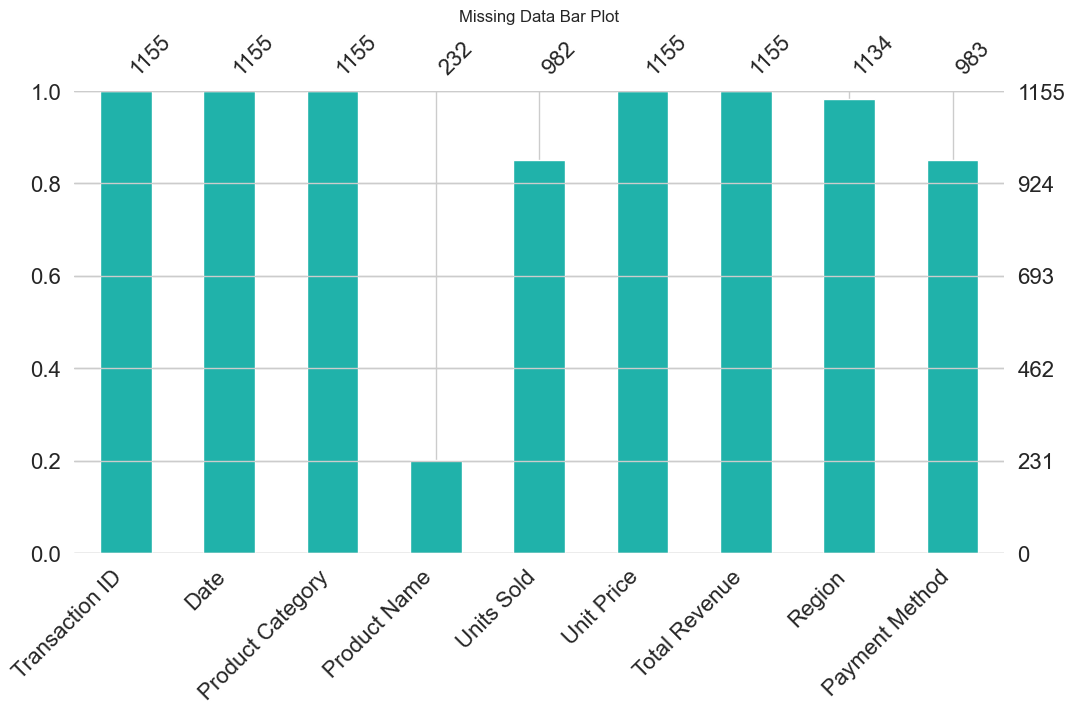

In [115]:
# To show n. of non-missing per column.

msno.bar(data, figsize=(12,6), color='#20b2aa')
plt.title('Missing Data Bar Plot')
plt.show()

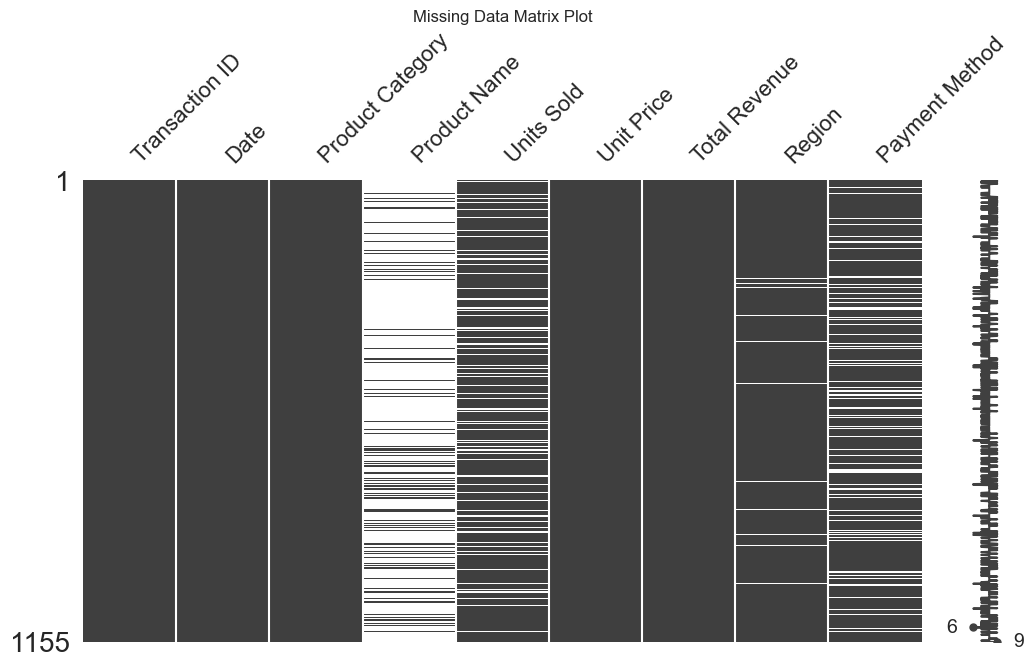

In [116]:
# Cluster columns with similar missing data patterns.

msno.matrix(data, figsize=(12,6))
plt.title('Missing Data Matrix Plot')
plt.show()

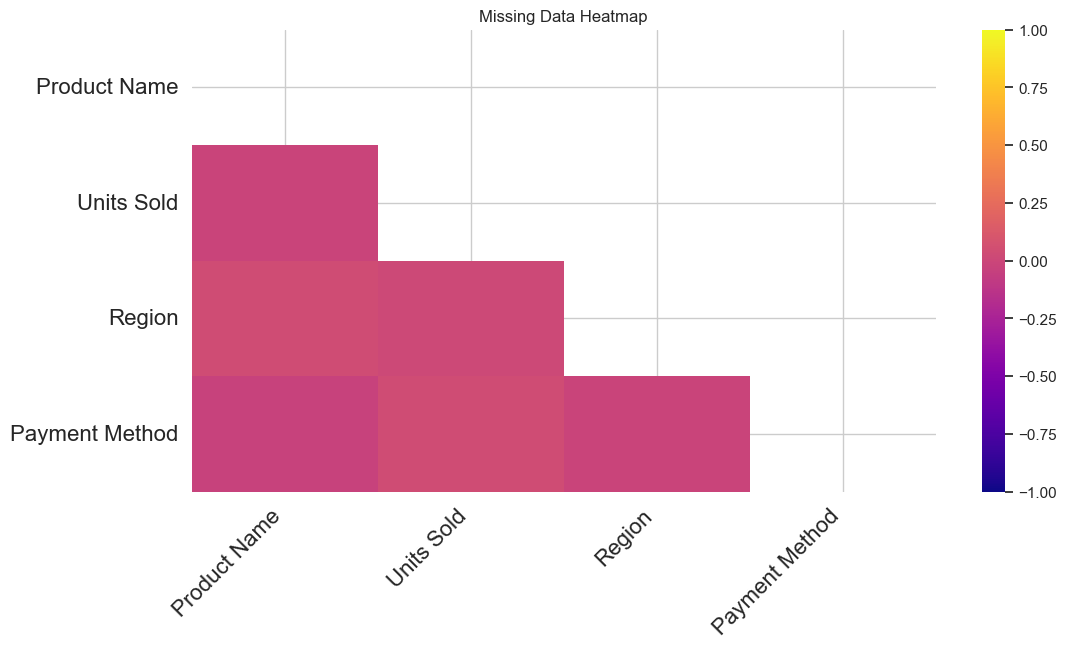

In [117]:
# Correlation heatmap showing relationship between missingness of different features.

msno.heatmap(data, figsize=(12,6), cmap="plasma")  # "viridis", "coolwarm", "plasma"
plt.title('Missing Data Heatmap')
plt.show()

> ### **Missing Values Summary:**

- The dataset contains 5 columns in total.
- `Transaction ID`, `Date`, and `Product Category` are clean and reliable for analysis.
- Matrix Plot shows that no clear pattern.
- Heatmap shows that no relationship between missingness of columns.
- From Bar Plot:
    - The column `Product Name` has the highest percentage of missing data with 923 missing values (almost 80%).
    - The column `Units Sold` has 173 missing values (~15%).
    - The column `Payment Method` has 172 missing values (~15%).

### **2.3 Determine the missing data mechanism**

1. `Product Name`:
    - Missingness Mechanism: MCAR.
    - No strong correlation with other values or missing values.
    - Strategy: Drop this feature.

2. `Units Sold`:
    - Missingness Mechanism: MNAR.
    - Maybe missing when calculation errors occurred.
    - Strategy: calculated from `Total Revenue` / `Unit Price`.

3. `Payment Method`:
    - Missingness Mechanism: MCAR.
    - Missing `payment methods` don't show pattern by `region/category`.
    - Strategy: Impute with mode.

### **2.4 Clean Missing Data**

In [119]:
# Drop Product Name column due to high number of missing values.
data.drop('Product Name', axis=1, inplace=True)

In [120]:
# Impute Units Sold using data['Total Revenue'] / data['Unit Price']
data['Units Sold'] = data['Units Sold'].fillna(np.ceil(data['Total Revenue'] / data['Unit Price']))

In [121]:
data["Units Sold"] = data["Units Sold"].astype('int')

In [ ]:
# Impute Payment Method with mode
data['Payment Method'] = data.groupby("Region", observed=False)["Payment Method"].transform(lambda x: x.fillna(x.mode()[0]))
data['Payment Method']

0       Credit Card
1            PayPal
2        Debit Card
3       Credit Card
4            PayPal
           ...     
1150         PayPal
1151    Credit Card
1152    Credit Card
1153    Credit Card
1154         PayPal
Name: Payment Method, Length: 1155, dtype: category
Categories (7, object): ['Bank Transfer', 'Credit Card', 'Cryptocurrency', 'Debit Card', 'Gift Card', 'Mobile Payment', 'PayPal']

### **2.5 Duplicate Detection**

In [123]:
# Check for Duplication
data.duplicated(subset="Transaction ID").sum()

55

In [124]:
# Drop Dupicated Records.
data.drop_duplicates(subset="Transaction ID", inplace = True)

# Check After Dropping.
data.duplicated().sum()

0

### **2.6 Outlier Investigation**

> ### **IQR**

In [125]:
# Calculate Q1 and Q3 for Units Sold
missing_columns = ['Units Sold', 'Unit Price', 'Total Revenue']
for col in missing_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = round(Q1 - 1.5 * IQR, 2) #left whisker
    upper_bound = round(Q3 + 1.5 * IQR, 2) #right whisker

    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")

    # Identify outliers
    outliers = data[col][(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Number of outliers in {col}: {outliers.shape[0]}")
    print("************************************")

Lower Bound: -2.0
Upper Bound: 6.0
Number of outliers in Units Sold: 80
************************************
Lower Bound: -902.73
Upper Bound: 1570.85
Number of outliers in Unit Price: 44
************************************
Lower Bound: -1666.34
Upper Bound: 2935.14
Number of outliers in Total Revenue: 113
************************************


> ### **Z-score**

In [126]:
# Calculate Z-scores for Fare
missing_columns = ['Units Sold', 'Unit Price', 'Total Revenue']
for col in missing_columns:
    data[f'{col}_zscore'] = stats.zscore(data[col])
    
    # Identify outliers with Z-score > 3 or < -3
    outliers_z = data[np.abs(data[f'{col}_zscore']) > 3]
    print(f"Number of outliers in {col} based on Z-score: {outliers_z.shape[0]}")
    print("************************************")

Number of outliers in Units Sold based on Z-score: 43
************************************
Number of outliers in Unit Price based on Z-score: 30
************************************
Number of outliers in Total Revenue based on Z-score: 15
************************************


In [127]:
# Drop Z-score Columns
data.drop(columns=['Units Sold_zscore', 'Unit Price_zscore', 'Total Revenue_zscore'], inplace = True)

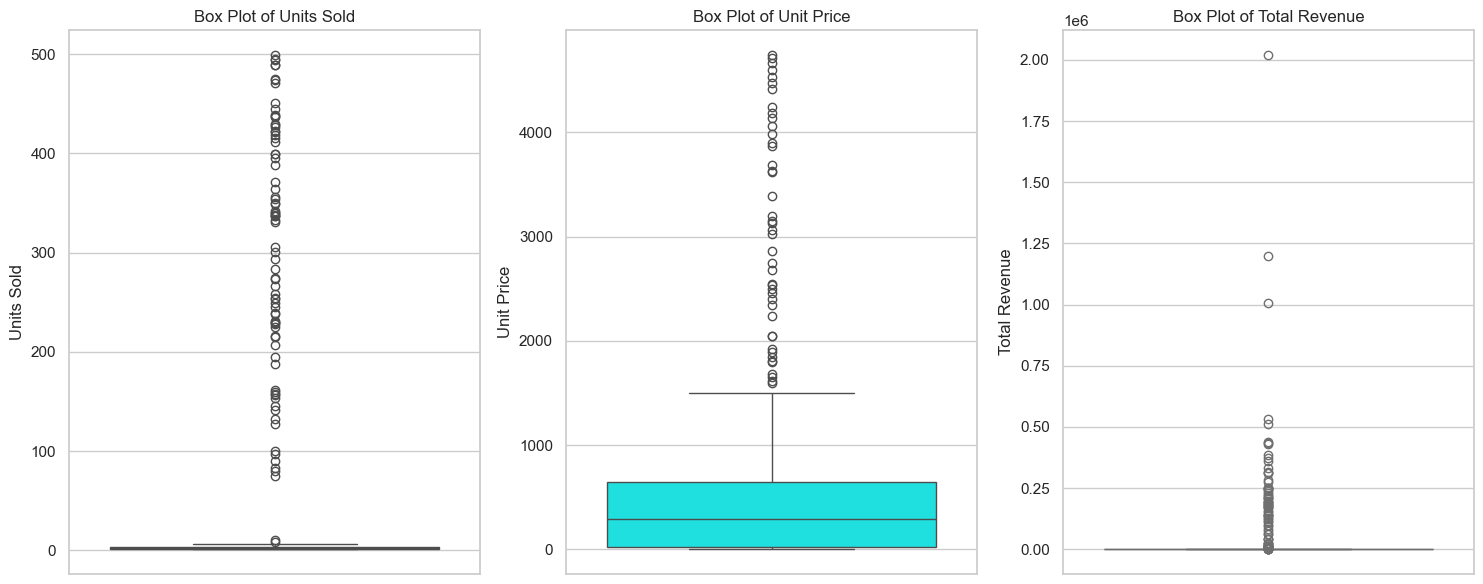

In [128]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data['Units Sold'], color='red')
plt.title('Box Plot of Units Sold')

plt.subplot(1, 3, 2)
sns.boxplot(data['Unit Price'], color='cyan')
plt.title('Box Plot of Unit Price')

plt.subplot(1, 3, 3)
sns.boxplot(data['Total Revenue'], color='skyblue')
plt.title('Box Plot of Total Revenue')

plt.tight_layout()
plt.show()

### **2.7 Outlier Handling**

> ### Outlier Handling Strategy

- **Removing outliers may decrease the quality of data**  

- **Chosen Approach: Capping using IQR**  
    - We replace outliers by the IQR bounds with lower/upper whisker values.

- **Why not Z-score?**  
    - Z-score assumes the data is approximately normally distributed.  
    - If the data distribution is skewed or not normal, Z-score becomes less efficient in detecting true outliers.  


In [129]:
missing_columns = ['Units Sold', 'Unit Price', 'Total Revenue']
for col in missing_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = round(Q1 - 1.5 * IQR, 2)
    upper_bound = round(Q3 + 1.5 * IQR, 2)
    
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])

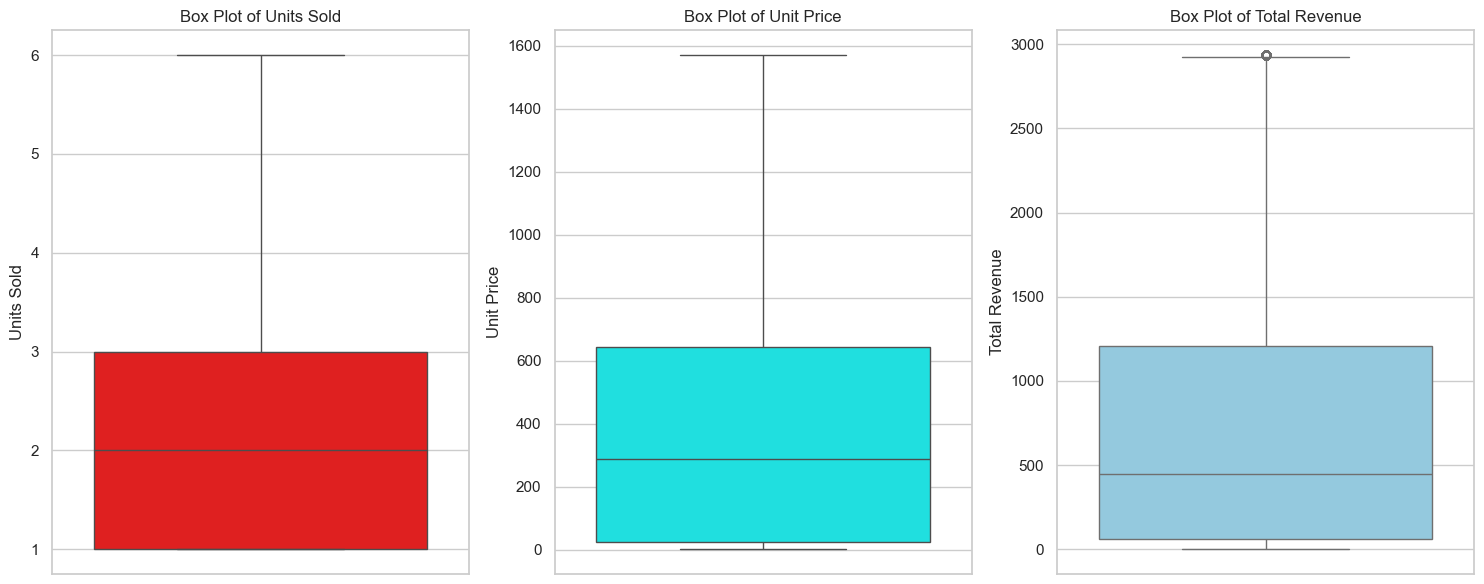

In [130]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.boxplot(data['Units Sold'], color='red')
plt.title('Box Plot of Units Sold')

plt.subplot(1, 3, 2)
sns.boxplot(data['Unit Price'], color='cyan')
plt.title('Box Plot of Unit Price')

plt.subplot(1, 3, 3)
sns.boxplot(data['Total Revenue'], color='skyblue')
plt.title('Box Plot of Total Revenue')

plt.tight_layout()
plt.show()

### **2.7 Data Consistancy**

In [132]:
# Recalculate Total Revenue from Units Sold * Unit Price
data['Calculated_Total_Revenue'] = round(data['Units Sold'] * data['Unit Price'], 2)

In [133]:
# Check if there is equality
inconsistent = data[data["Total Revenue"].round(2) != data["Calculated_Total_Revenue"].round(2)]

# Calculate the difference between original and recalculated Total Revenue
data["Revenue_Diff"] = data["Total Revenue"] - data["Calculated_Total_Revenue"]

# Keep only rows where the difference is greater than 0.01 
inconsistent = data[data["Revenue_Diff"] > 0.01]
print(inconsistent.shape[0], "rows inconsistent")

62 rows inconsistent


In [134]:
# Replace Total Revenue with corrected values
data["Total Revenue"] = data["Calculated_Total_Revenue"]

In [135]:
data.drop(columns = ["Calculated_Total_Revenue", "Revenue_Diff"], inplace = True)

#  **3. Exploratory Data Analysis (EDA)**

### **3.1 Time Period**

> ### **Daily**

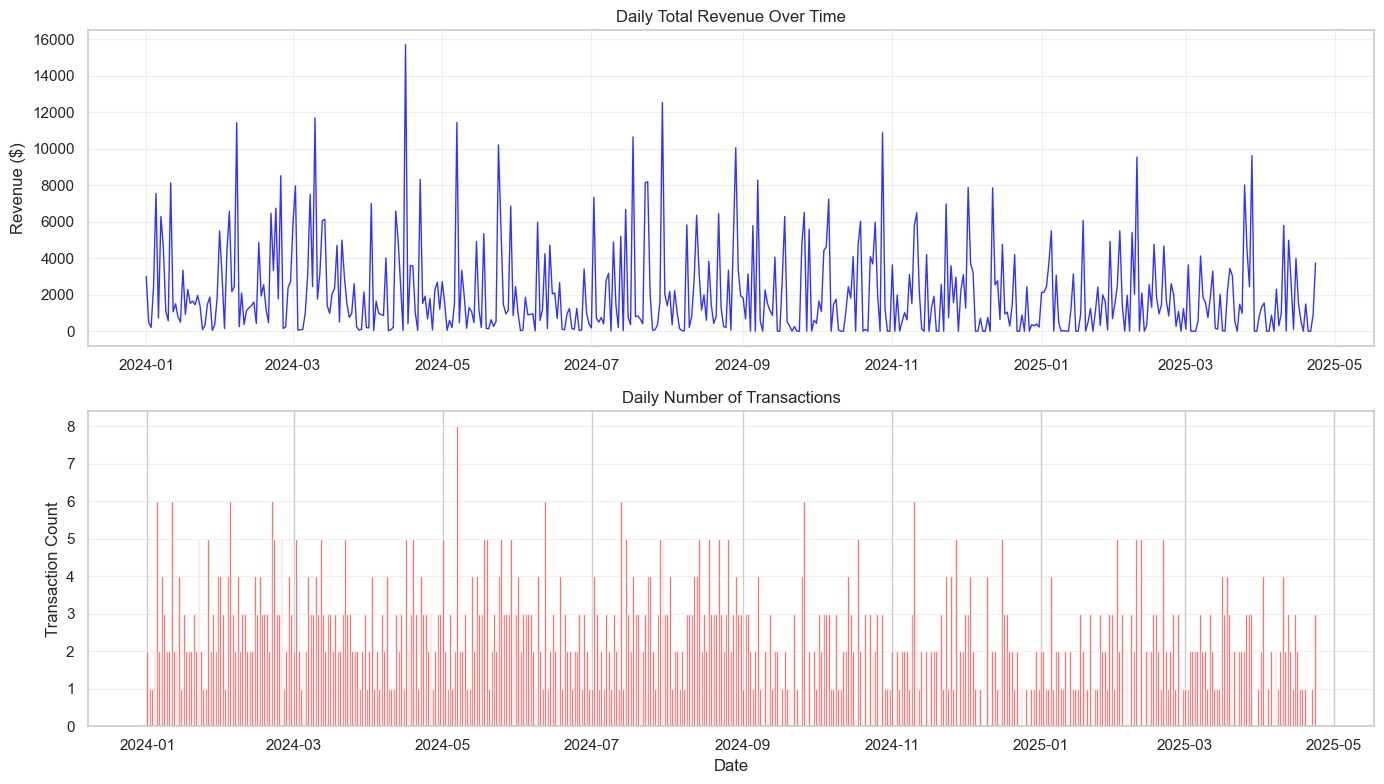

In [137]:
daily_revenue = data.set_index('Date')['Total Revenue'].resample('D').sum()
daily_transactions = data.set_index('Date')['Transaction ID'].resample('D').count()

plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(daily_revenue.index, daily_revenue.values, color='blue', alpha=0.8, linewidth=1)
plt.title('Daily Total Revenue Over Time')
plt.ylabel('Revenue ($)')
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.bar(daily_transactions.index, daily_transactions.values, width=0.8, color='red', alpha=0.8)
plt.title('Daily Number of Transactions')
plt.ylabel('Transaction Count')
plt.xlabel('Date')
plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Highest revenue day: Friday
Busiest transaction day: Wednesday


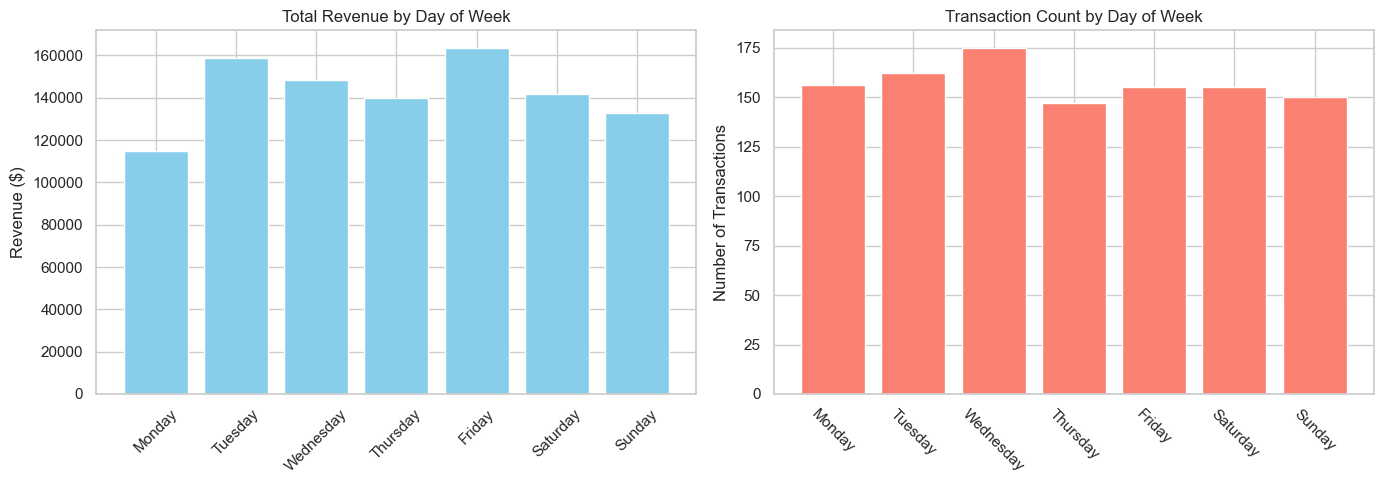

In [138]:
# Extract day name temporarily for grouping
revenue_by_day = data.groupby(data['Date'].dt.day_name())['Total Revenue'].sum()
count_by_day = data.groupby(data['Date'].dt.day_name())['Transaction ID'].count()

# Reindex to standard week order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
revenue_by_day = revenue_by_day.reindex(day_order)
count_by_day = count_by_day.reindex(day_order)

print("Highest revenue day:", revenue_by_day.idxmax())
print("Busiest transaction day:", count_by_day.idxmax())

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.bar(revenue_by_day.index, revenue_by_day.values, color='skyblue')
plt.title('Total Revenue by Day of Week')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(count_by_day.index, count_by_day.values, color='salmon')
plt.title('Transaction Count by Day of Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=315)

plt.tight_layout()
plt.show()


> ### **Monthly**

Peak revenue month: March
Most transactions month: February


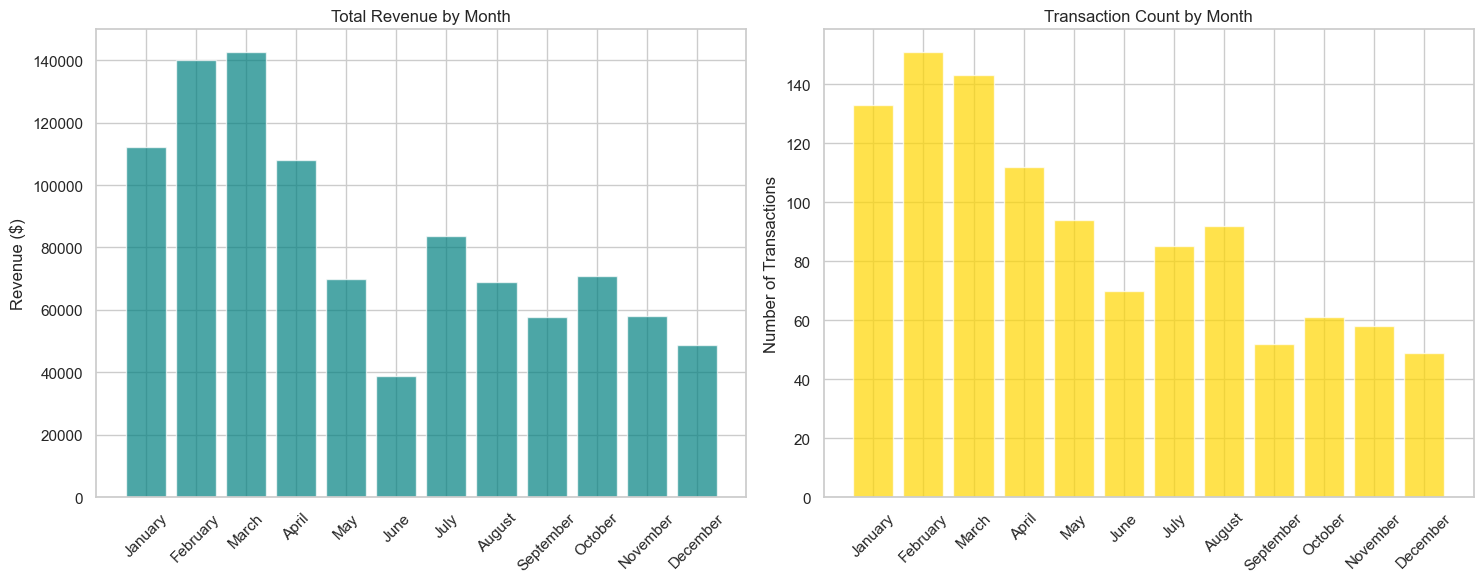

In [139]:
revenue_by_month = data.groupby(data['Date'].dt.month_name())['Total Revenue'].sum()
count_by_month = data.groupby(data['Date'].dt.month_name())['Transaction ID'].count()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
revenue_by_month = revenue_by_month.reindex(month_order)
count_by_month = count_by_month.reindex(month_order)

print("Peak revenue month:", revenue_by_month.idxmax())
print("Most transactions month:", count_by_month.idxmax())

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.bar(revenue_by_month.index, revenue_by_month.values, color='teal', alpha=0.7)
plt.title('Total Revenue by Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(count_by_month.index, count_by_month.values, color='gold', alpha=0.7)
plt.title('Transaction Count by Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Peak revenue month: 2024-03
Most transactions month: 2024-05


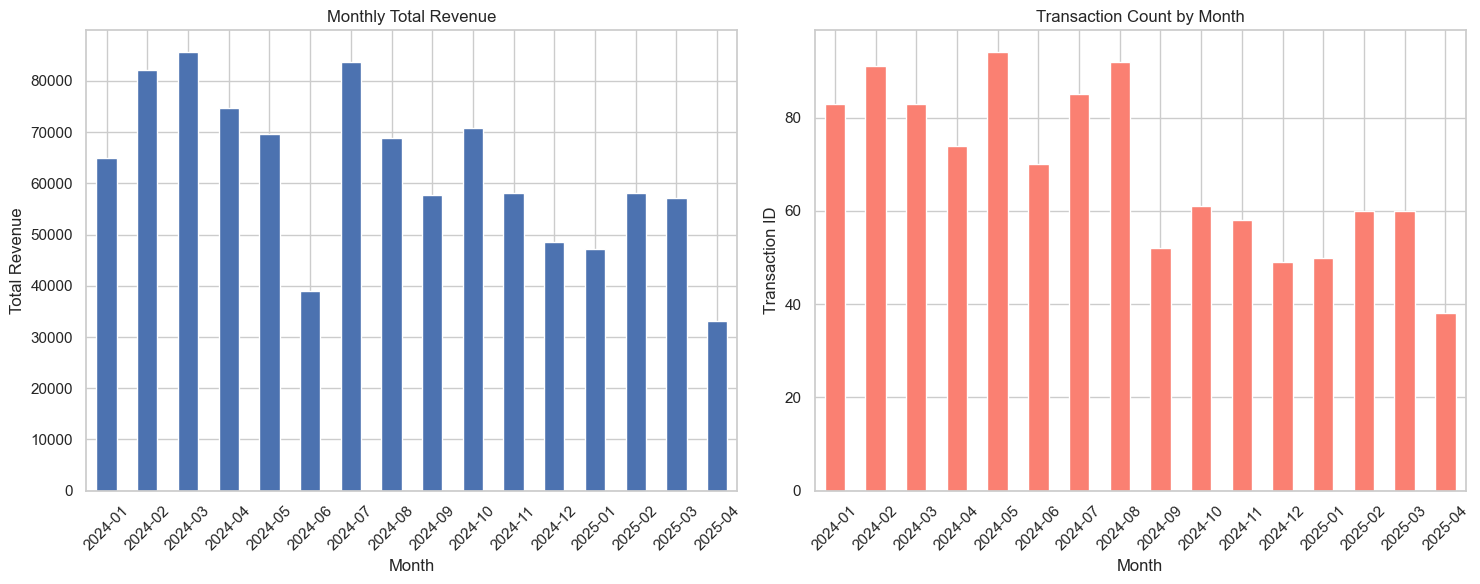

In [140]:
all_monthly_sales = data.groupby(data["Date"].dt.to_period("M"))["Total Revenue"].sum()
all_monthly_Transaction = data.groupby(data["Date"].dt.to_period("M"))["Transaction ID"].count()

print("Peak revenue month:", all_monthly_sales.idxmax())
print("Most transactions month:", all_monthly_Transaction.idxmax())

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
all_monthly_sales.plot(kind="bar")
plt.title("Monthly Total Revenue")
plt.xlabel("Month")
plt.xticks(rotation = 45)
plt.ylabel("Total Revenue")

plt.subplot(1, 2, 2)
all_monthly_Transaction.plot(kind="bar", color='salmon')
plt.title("Transaction Count by Month")
plt.xlabel("Month")
plt.xticks(rotation = 45)
plt.ylabel("Transaction ID")

plt.tight_layout()
plt.show()

> ### **Seasonal**

Highest revenue season: Spring
Most active season: Spring


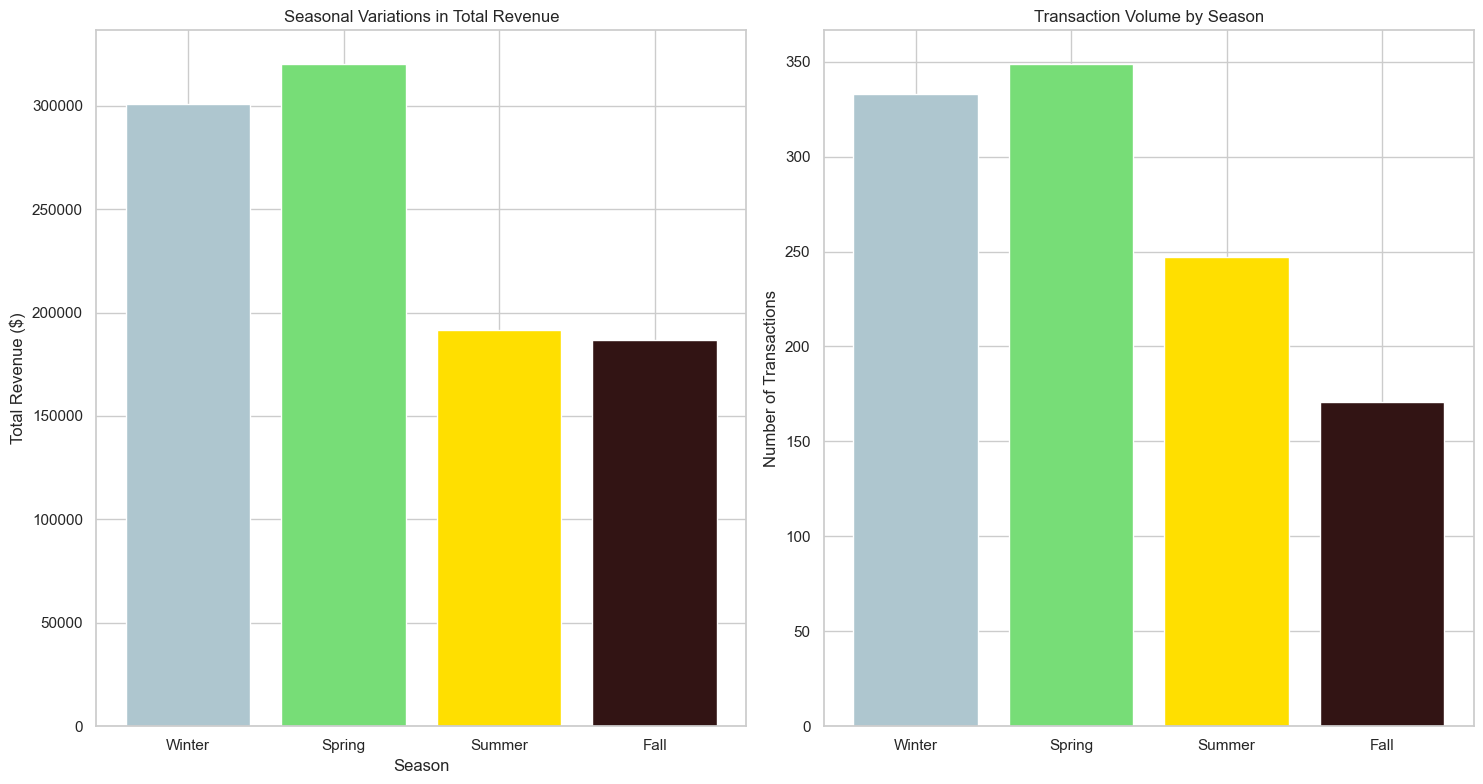

In [141]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

seasonal_agg = data.groupby(data['Date'].dt.month.apply(get_season)).agg({
    'Total Revenue': 'sum',
    'Transaction ID': 'count'
}).reindex(['Winter', 'Spring', 'Summer', 'Fall'])

print("Highest revenue season:", seasonal_agg['Total Revenue'].idxmax())
print("Most active season:", seasonal_agg['Transaction ID'].idxmax())


plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.bar(seasonal_agg.index, seasonal_agg['Total Revenue'], color=['#aec6cf', '#77dd77', '#ffdf00', '#321414'])
plt.title('Seasonal Variations in Total Revenue')
plt.xlabel('Season')
plt.ylabel('Total Revenue ($)')

plt.subplot(1, 2, 2)
plt.bar(seasonal_agg.index, seasonal_agg['Transaction ID'], color=['#aec6cf', '#77dd77', '#ffdf00', '#321414'])
plt.title('Transaction Volume by Season')
plt.ylabel('Number of Transactions')

plt.tight_layout()
plt.show()

> ### **Sales Trend**


 Sales are decreasing by about $2135.7 per month.


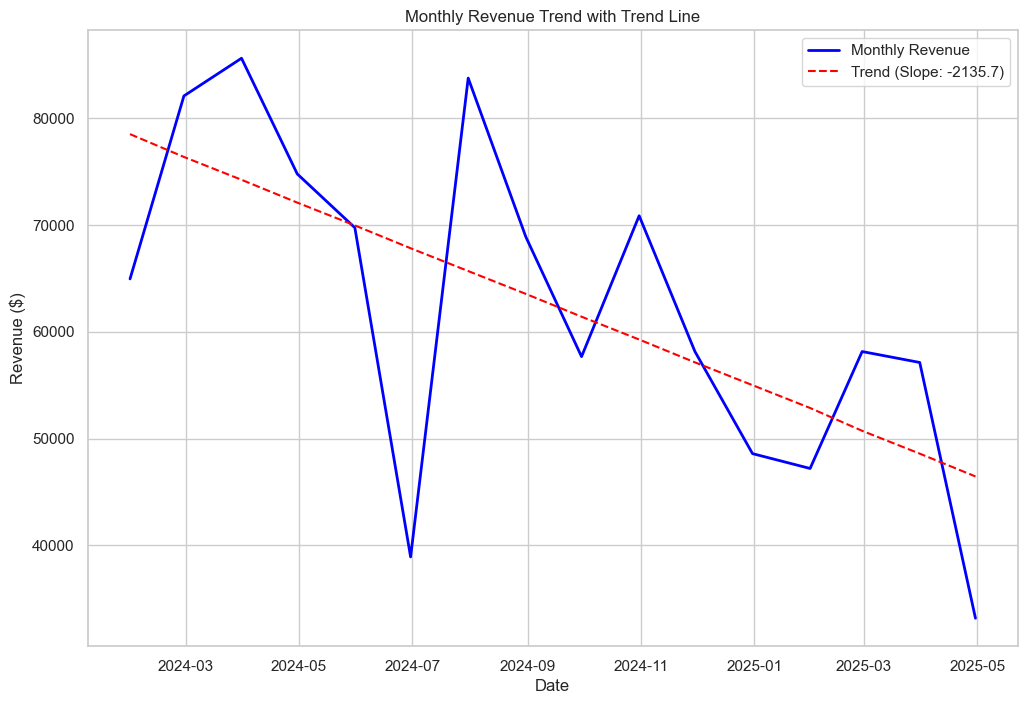

In [142]:
monthly_revenue = data.set_index('Date')['Total Revenue'].resample('ME').sum()

# Create a simple number line for x (like time: 0, 1, 2, ..., N)
x_numeric = range(len(monthly_revenue))

# Fit a straight line (linear trend)
slope, intercept = np.polyfit(x_numeric, monthly_revenue.values, 1)
trend_line = [slope * x + intercept for x in x_numeric]

if slope > 0:
    print(f"\n Sales are increasing by about ${slope:.1f} per month.")
elif slope < 0:
    print(f"\n Sales are decreasing by about ${abs(slope):.1f} per month.")
else:
    print("\n Sales are stable (no clear trend).")

plt.figure(figsize=(12, 8))
plt.plot(monthly_revenue.index, monthly_revenue.values, color='blue', linewidth=2, label='Monthly Revenue')
plt.plot(monthly_revenue.index, trend_line, '--', color='red', label=f'Trend (Slope: {slope:+.1f})')
plt.title('Monthly Revenue Trend with Trend Line')
plt.ylabel('Revenue ($)')
plt.xlabel('Date')
plt.legend()

plt.show()

### **3.2 Product Category Performance**

> ### **Revenue Distribution Across Categories**

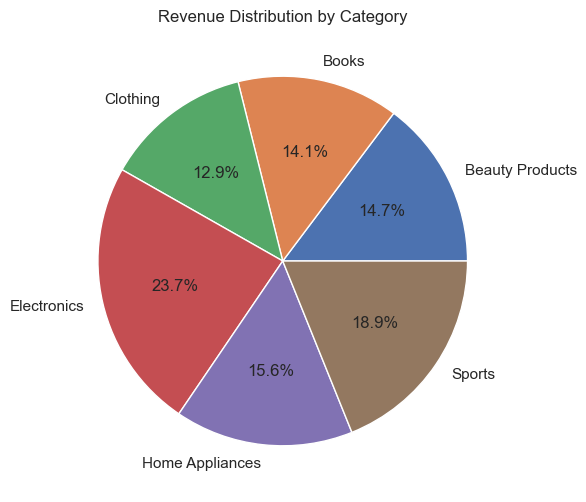

In [143]:
revenue_by_category = data.groupby('Product Category', observed=False)['Total Revenue'].sum()
total_revenue = revenue_by_category.sum()
revenue_percentages = ((revenue_by_category / total_revenue) * 100)

plt.figure(figsize=(10, 6))
plt.pie(revenue_percentages.values, labels=revenue_percentages.index, autopct='%1.1f%%')
plt.title('Revenue Distribution by Category')
plt.ylabel('')
plt.show()

> ### **Average Order Values by Category**

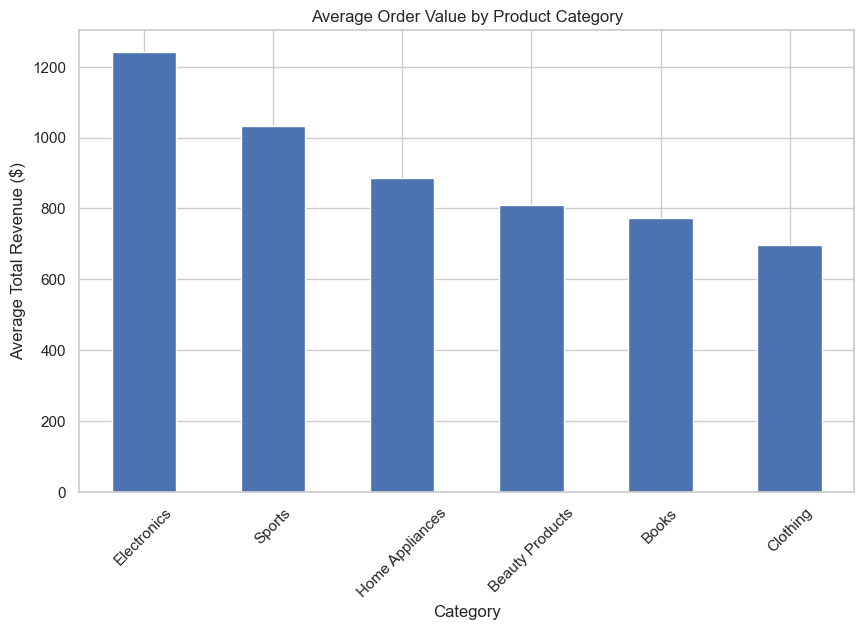

In [144]:
avg_order_value = data.groupby('Product Category', observed=False)['Total Revenue'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_order_value.plot(kind='bar')
plt.title('Average Order Value by Product Category')
plt.xlabel('Category')
plt.ylabel('Average Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()

> ### **Quantity Patterns by Category**

C:\Users\HP\AppData\Local\Temp\ipykernel_5840\1573640676.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantity_by_category = data.groupby('Product Category')['Units Sold'].agg(
C:\Users\HP\AppData\Local\Temp\ipykernel_5840\1573640676.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Average Quantity Purchased per Transaction by Category:
                  Mean_Quantity  Median_Quantity  Min_Quantity  Max_Quantity  \
Product Category                                                               
Beauty Products            1.94              1.0           1.0           6.0   
Books                      2.42              2.0           1.0           6.0   
Clothing                   2.40              2.0           1.0           6.0   
Electronics                2.37              2.0           1.0           6.0   
Home Appliances            2.15              2.0           1.0           6.0   
Sports                     2.27              2.0           1.0           6.0   

                  Total_Transactions  
Product Category                      
Beauty Products                  182  
Books                            183  
Clothing                         185  
Electronics                      191  
Home Appliances                  176  
Sports                        

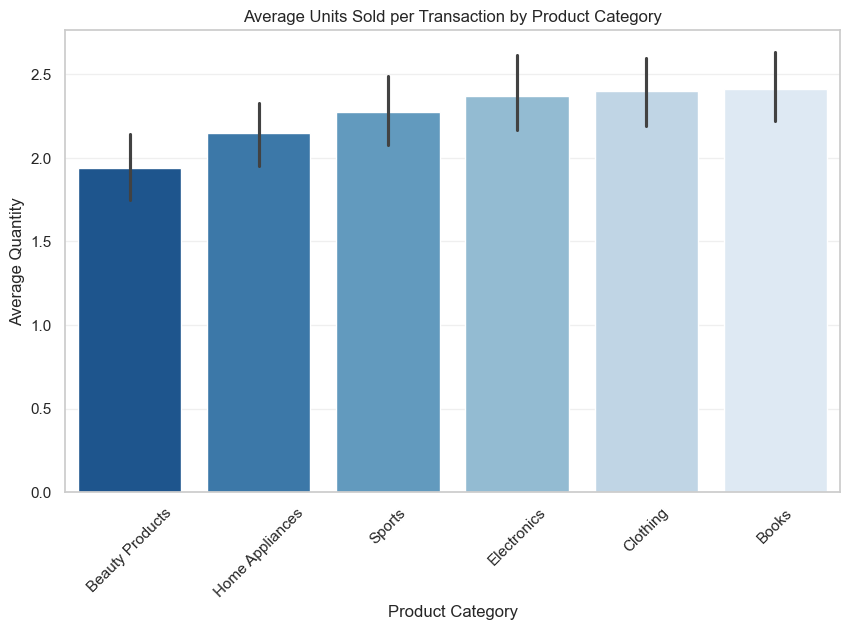

In [145]:
quantity_by_category = data.groupby('Product Category')['Units Sold'].agg(
    Mean_Quantity=('mean'),
    Median_Quantity=('median'),
    Min_Quantity=('min'),
    Max_Quantity=('max'),
    Total_Transactions=('count')
).round(2)

print("Average Quantity Purchased per Transaction by Category:")
print(quantity_by_category)

# Sort categories by average quantity for better plotting
sorted_categories = quantity_by_category.sort_values('Mean_Quantity').index

plt.figure(figsize=(10, 6))
sns.barplot(
    data=data,
    x='Product Category',
    y='Units Sold',
    order=sorted_categories,
    palette='Blues_r'
)
plt.title('Average Units Sold per Transaction by Product Category')
plt.ylabel('Average Quantity')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

> ### **Category Popularity Rankings**

C:\Users\HP\AppData\Local\Temp\ipykernel_5840\518036678.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_summary = data.groupby('Product Category').agg(
C:\Users\HP\AppData\Local\Temp\ipykernel_5840\518036678.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_5840\518036678.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


                  Total_Transactions  Total_Revenue  Average_Order_Value
Product Category                                                        
Beauty Products                  182      147371.10               809.73
Books                            183      141407.35               772.72
Clothing                         185      128836.29               696.41
Electronics                      191      237068.29              1241.20
Home Appliances                  176      156020.11               886.48
Sports                           183      188844.31              1031.94


C:\Users\HP\AppData\Local\Temp\ipykernel_5840\518036678.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


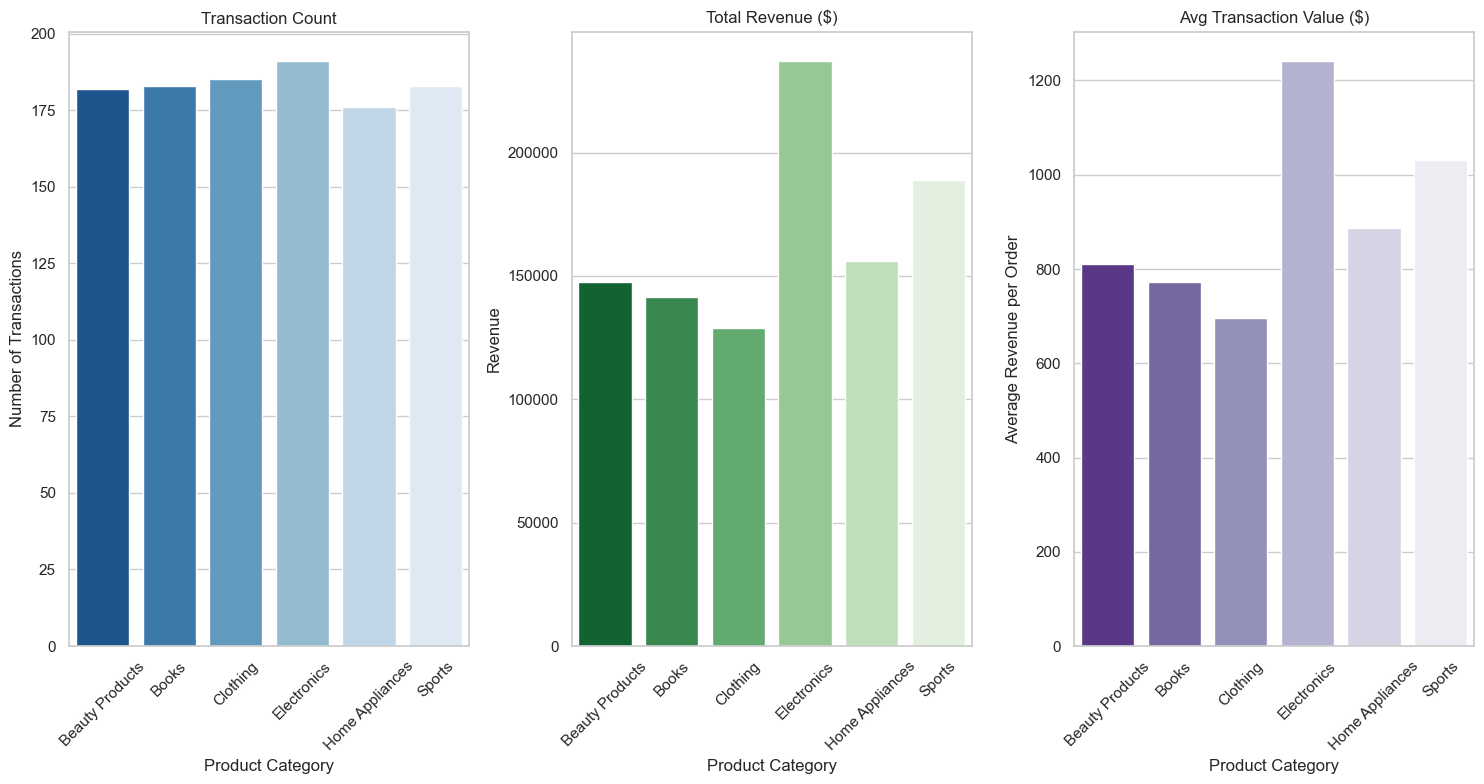

In [146]:
category_summary = data.groupby('Product Category').agg(
    Total_Transactions=('Transaction ID', 'count'),        # How many sales?
    Total_Revenue=('Total Revenue', 'sum'),                # How much money?
    Average_Order_Value=('Total Revenue', 'mean')          # Avg revenue per transaction
).round(2)

trans_rank = category_summary.sort_values('Total_Transactions', ascending=False)
rev_rank = category_summary.sort_values('Total_Revenue', ascending=False)
aov_rank = category_summary.sort_values('Average_Order_Value', ascending=False)

print(category_summary)
plt.figure(figsize=(15, 8))

# Subplot 1: Top 5 by Transactions
plt.subplot(1, 3, 1)
sns.barplot(
    x=trans_rank.index,
    y=trans_rank['Total_Transactions'],
    palette='Blues_r'
)
plt.title('Transaction Count')
plt.ylabel('Number of Transactions')
plt.xlabel('Product Category')
plt.xticks(rotation=45)

# Subplot 2: Top 5 by Total Revenue
plt.subplot(1, 3, 2)
sns.barplot(
    x=rev_rank.index,
    y=rev_rank['Total_Revenue'],
    palette='Greens_r'
)
plt.title('Total Revenue ($)')
plt.ylabel('Revenue')
plt.xlabel('Product Category')
plt.xticks(rotation=45)

# Subplot 3: Top 5 by Average Order Value
plt.subplot(1, 3, 3)
sns.barplot(
    x=aov_rank.index,
    y=aov_rank['Average_Order_Value'],
    palette='Purples_r'
)
plt.title('Avg Transaction Value ($)')
plt.ylabel('Average Revenue per Order')
plt.xlabel('Product Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### **3.3 Geographic Analysis**

> ### **Regional sales performance comparison**

C:\Users\HP\AppData\Local\Temp\ipykernel_5840\1263175148.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_revenue = data.groupby('Region')['Total Revenue'].sum()
C:\Users\HP\AppData\Local\Temp\ipykernel_5840\1263175148.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_transaction = data.groupby('Region')['Total Revenue'].mean()
C:\Users\HP\AppData\Local\Temp\ipykernel_5840\1263175148.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defaul

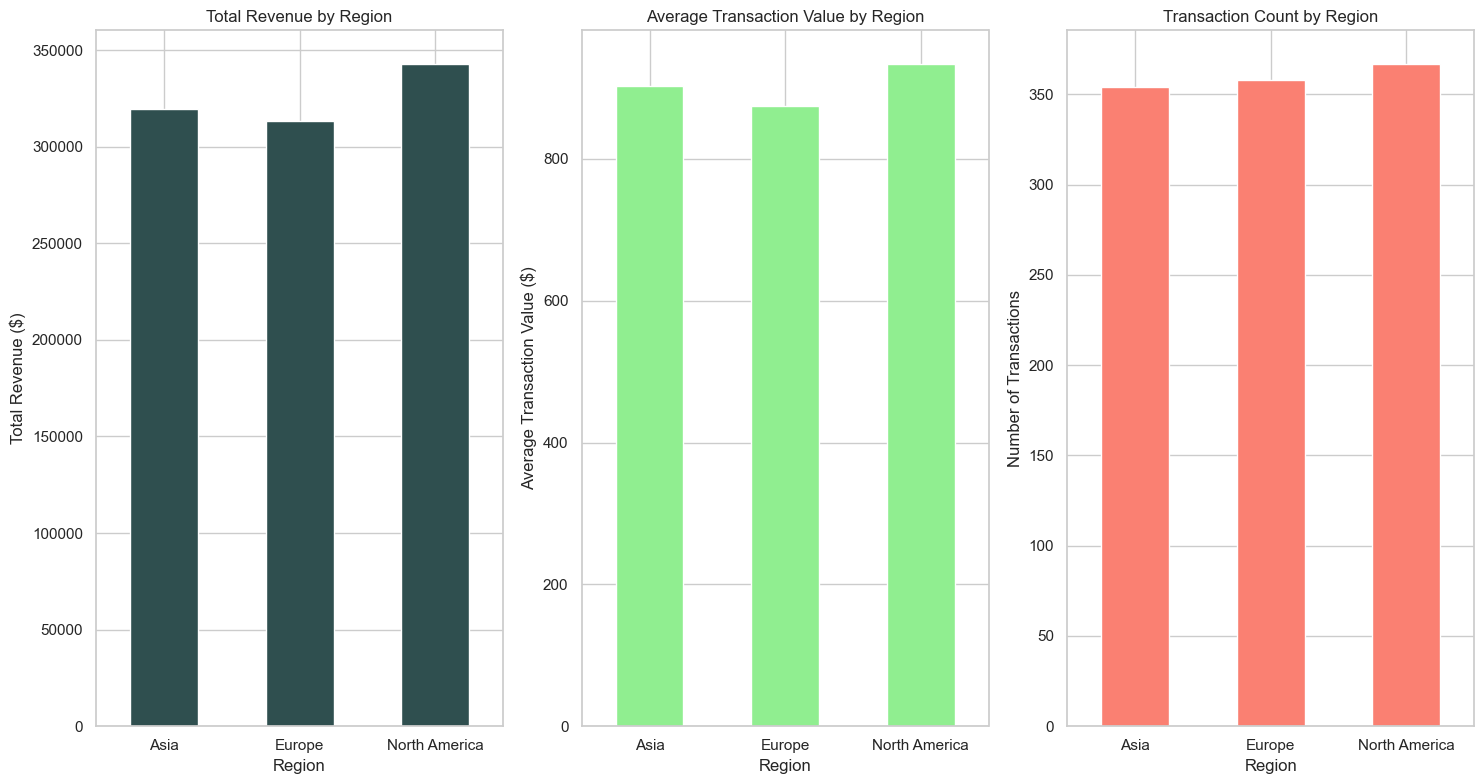

In [147]:
total_revenue = data.groupby('Region')['Total Revenue'].sum()
avg_transaction = data.groupby('Region')['Total Revenue'].mean()
transaction_count = data.groupby('Region')['Transaction ID'].count()

plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 1)
total_revenue.plot(kind='bar', color='#2f4f4f')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
avg_transaction.plot(kind='bar', color='lightgreen')
plt.title('Average Transaction Value by Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value ($)')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
transaction_count.plot(kind='bar', color='salmon')
plt.title('Transaction Count by Region')
plt.xlabel('Region')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

> ### **Revenue Distribution Across Regions**

C:\Users\HP\AppData\Local\Temp\ipykernel_5840\1633470781.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_region = data.groupby('Region')['Total Revenue'].sum()


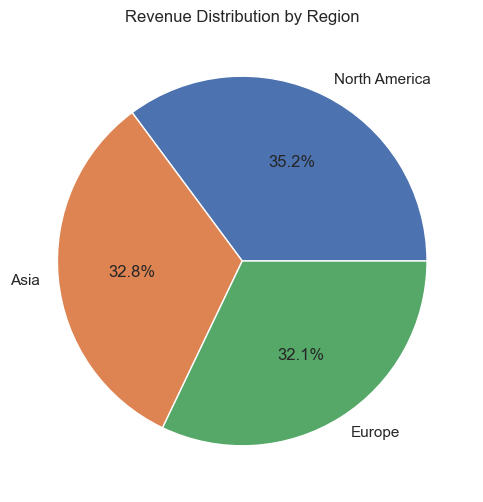

In [148]:
revenue_by_region = data.groupby('Region')['Total Revenue'].sum()
total_revenue = revenue_by_region.sum()
revenue_percentages = ((revenue_by_region / total_revenue) * 100).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
revenue_percentages.plot(kind='pie', autopct='%1.1f%%')
plt.title('Revenue Distribution by Region')
plt.ylabel('')
plt.show()

> ### **Regional Category Preferences**

C:\Users\HP\AppData\Local\Temp\ipykernel_5840\3257085216.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regional_category_revenue = data.groupby(['Region', 'Product Category'])['Total Revenue'].sum().unstack()


==> Asia: Top category is 'Electronics' ==> ($78,981 revenue)
==> Europe: Top category is 'Home Appliances' ==> ($72,891 revenue)
==> North America: Top category is 'Electronics' ==> ($88,907 revenue)


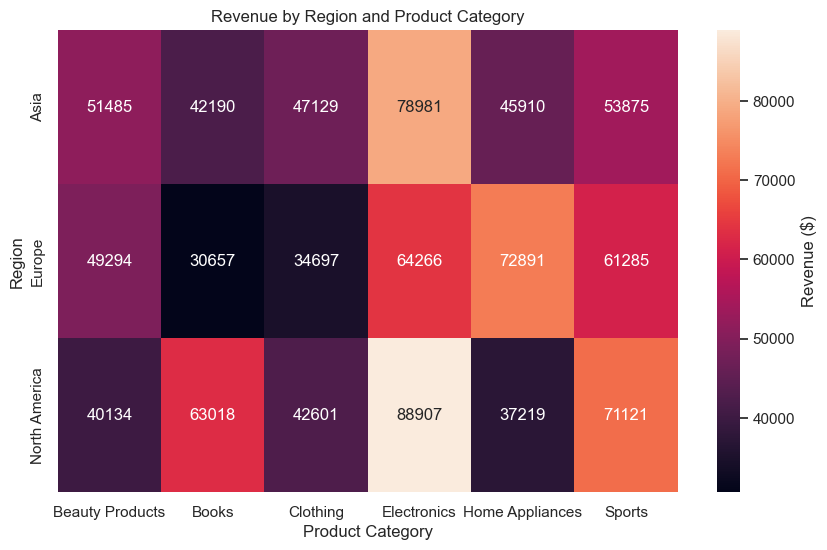

In [149]:
regional_category_revenue = data.groupby(['Region', 'Product Category'])['Total Revenue'].sum().unstack()

for region in regional_category_revenue.index:
    top_cat = regional_category_revenue.loc[region].idxmax()
    max_rev = regional_category_revenue.loc[region].max()
    print(f"==> {region}: Top category is '{top_cat}' ==> (${max_rev:,.0f} revenue)")

plt.figure(figsize=(10, 6))
sns.heatmap(regional_category_revenue, annot=True, fmt='.0f', cbar_kws={'label': 'Revenue ($)'})
plt.title('Revenue by Region and Product Category')
plt.ylabel('Region')
plt.xlabel('Product Category')
plt.show()

<Figure size 1500x800 with 0 Axes>

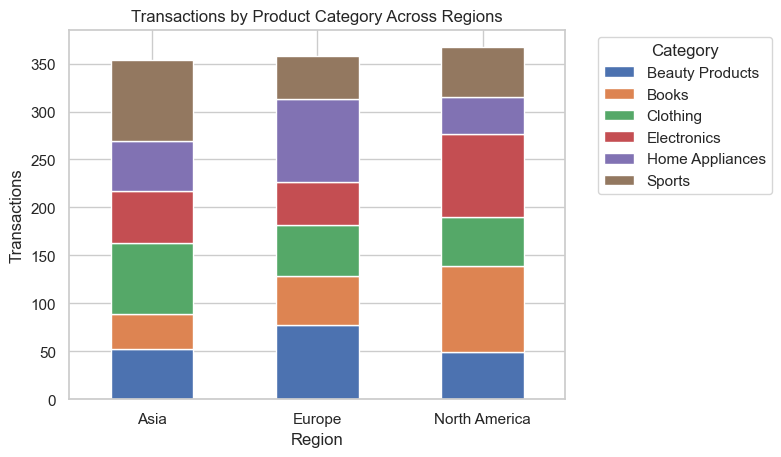

In [150]:
category_by_region = data.groupby(['Region', 'Product Category'], observed=False)['Transaction ID'].count().unstack()

plt.figure(figsize=(15, 8))
category_by_region.plot(kind='bar', stacked=True)
plt.title('Transactions by Product Category Across Regions')
plt.xlabel('Region')
plt.ylabel('Transactions')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 0)
plt.show()

### **3.4 Payment Method Analysis**

> ### **Payment Method Adoption Rates**

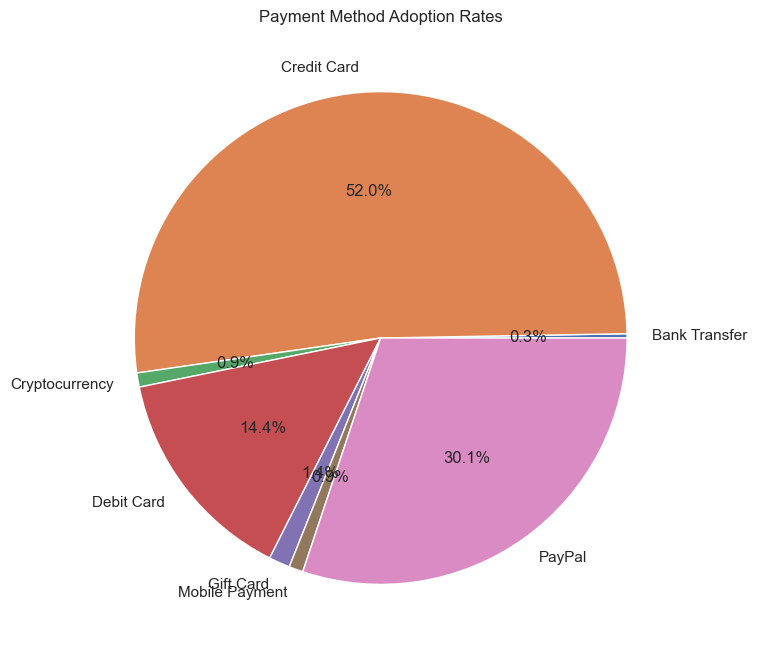

In [151]:
payment_counts = data.groupby('Payment Method', observed=False)['Transaction ID'].count()
total_transactions = payment_counts.sum()
adoption_rates = ((payment_counts / total_transactions) * 100)

plt.figure(figsize=(15, 8))
adoption_rates.plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Method Adoption Rates')
plt.ylabel('')
plt.show()

> ### **Average Transaction Values by Payment Type**

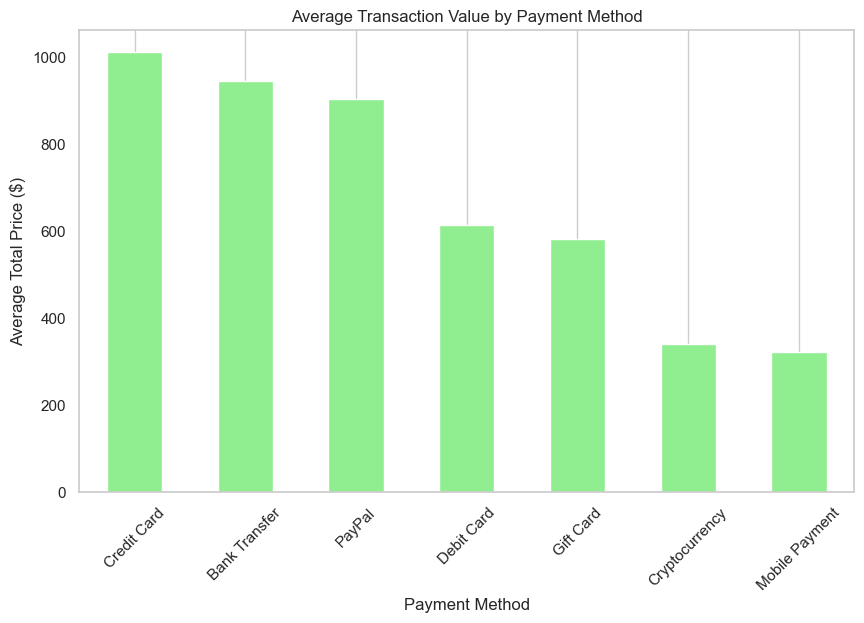

In [152]:
avg_transaction = data.groupby('Payment Method', observed=False)['Total Revenue'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_transaction.plot(kind='bar', color='lightgreen')
plt.title('Average Transaction Value by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Total Price ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

> ### **Regional Payment Preferences**

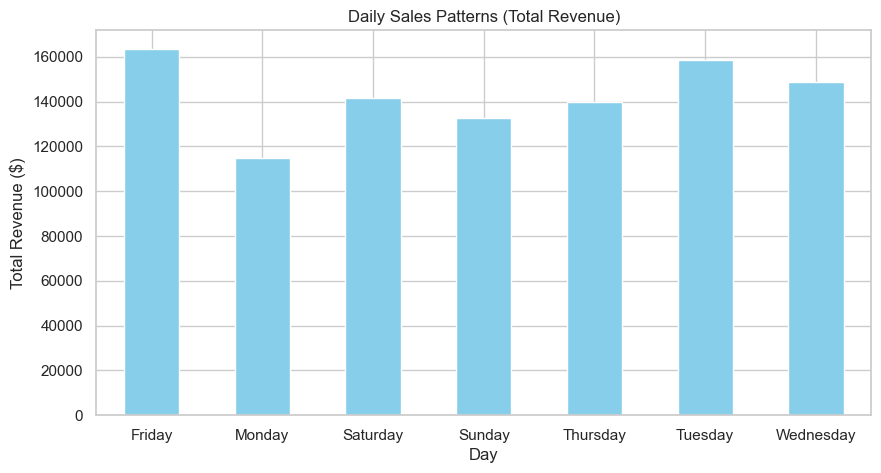

In [153]:
daily_revenue_day_name = data.groupby(data['Date'].dt.day_name())['Total Revenue'].sum()

daily_revenue_day_name.plot(kind='bar', color='skyblue', figsize=(10,5))
plt.title('Daily Sales Patterns (Total Revenue)')
plt.xlabel("Day")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=0)
plt.show()

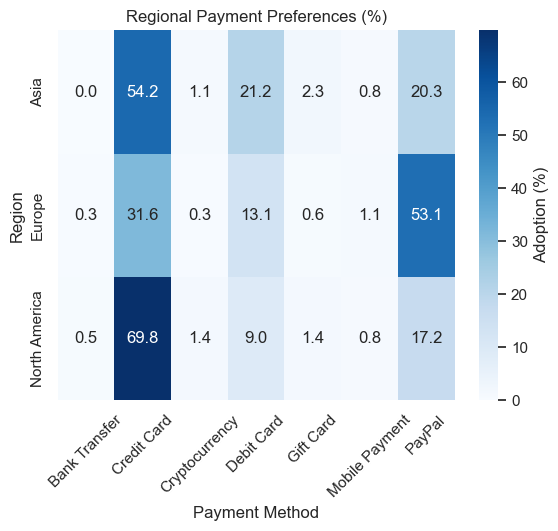

In [154]:
region_payment_pivot = pd.crosstab(
    data['Region'],
    data['Payment Method'],
    normalize='index') * 100

sns.heatmap(region_payment_pivot, annot=True, fmt='.1f', cmap='Blues', cbar_kws={'label': 'Adoption (%)'})
plt.title('Regional Payment Preferences (%)')
plt.ylabel('Region')
plt.xlabel('Payment Method')
plt.xticks(rotation=45)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5840\1179717731.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_by_region = data.groupby(['Region', 'Payment Method'])['Transaction ID'].count().unstack()


<Figure size 1200x800 with 0 Axes>

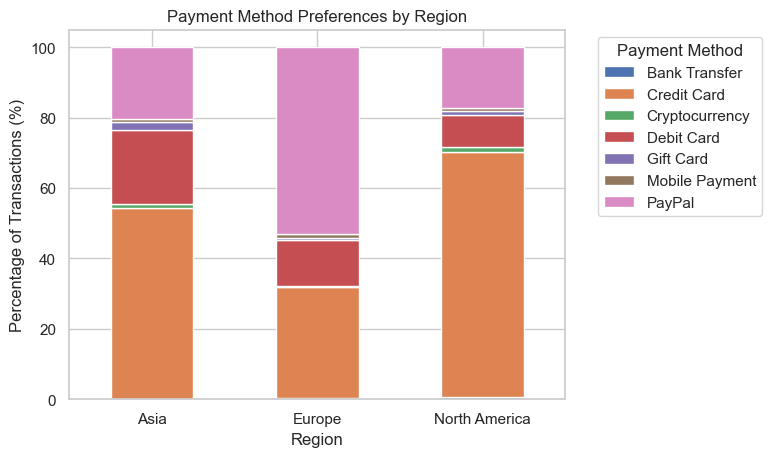

In [155]:
payment_by_region = data.groupby(['Region', 'Payment Method'])['Transaction ID'].count().unstack()

payment_by_region_pct = payment_by_region.div(payment_by_region.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 8))
payment_by_region_pct.plot(kind='bar', stacked=True)
plt.title('Payment Method Preferences by Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Transactions (%)')
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

### **3.5 Price and Quantity Insights**

> ### **Price Distribution Analysis Across Categories**

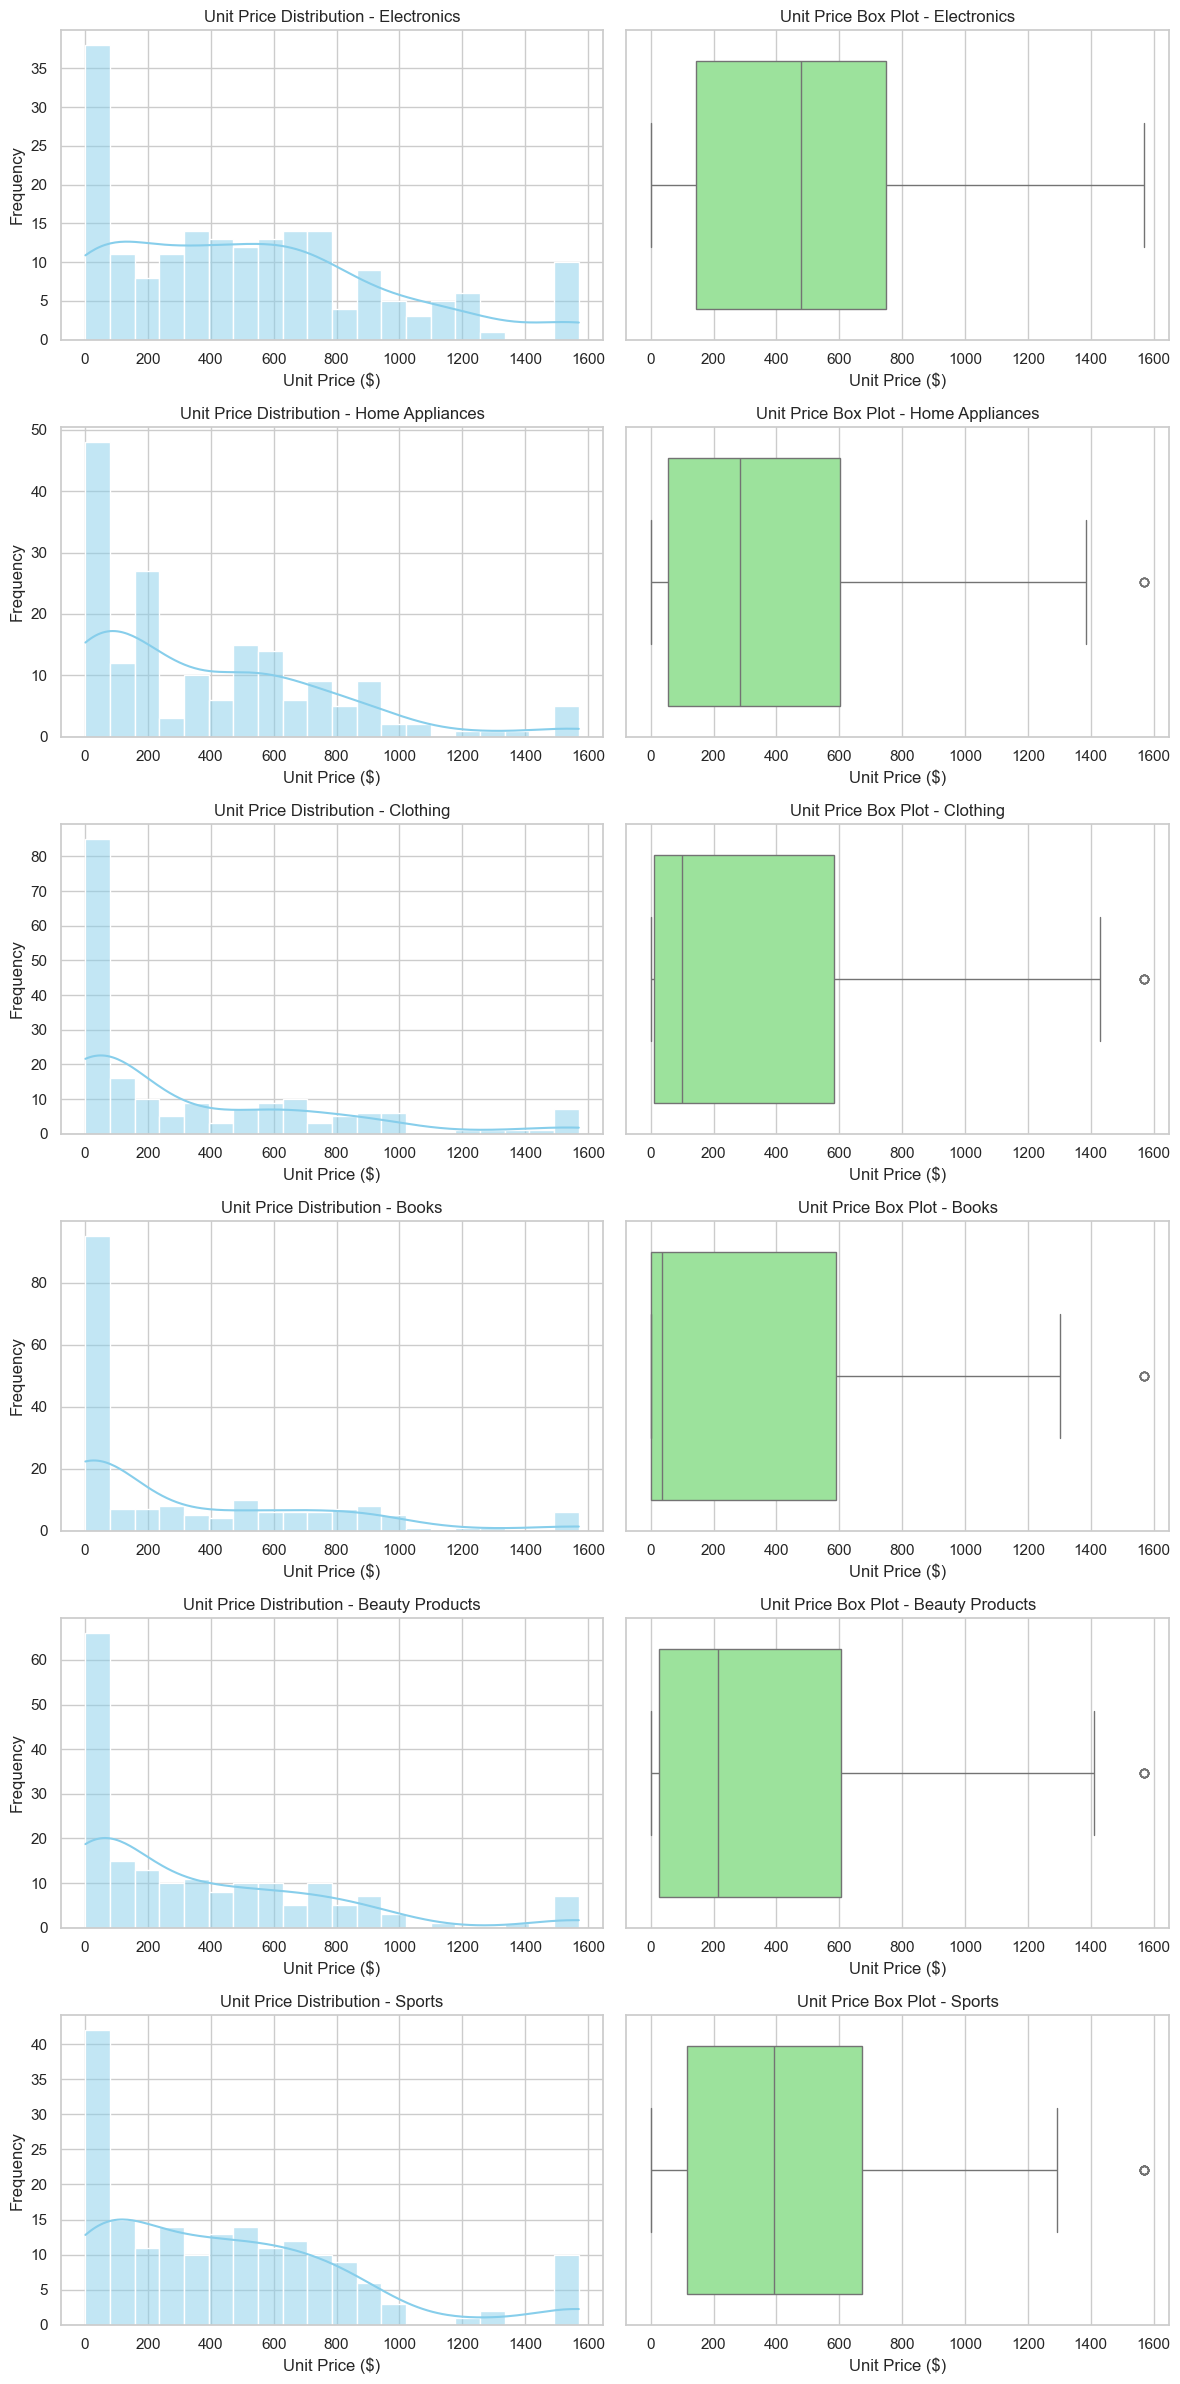

In [156]:
categories = data['Product Category'].unique()

plt.figure(figsize=(12, 4 * len(categories)))

for i, category in enumerate(categories, start=1):
    category_data = data[data['Product Category'] == category]['Unit Price']
    
    plt.subplot(len(categories), 2, 2 * (i - 1) + 1)
    sns.histplot(category_data, bins=20, kde=True, color="skyblue")
    plt.title(f'Unit Price Distribution - {category}')
    plt.xlabel('Unit Price ($)')
    plt.ylabel('Frequency')
    
    plt.subplot(len(categories), 2, 2 * (i - 1) + 2)
    sns.boxplot(x=category_data, color="lightgreen")
    plt.title(f'Unit Price Box Plot - {category}')
    plt.xlabel('Unit Price ($)')

plt.tight_layout()
plt.show()

> ### **Quantity Purchase Patterns**

C:\Users\HP\AppData\Local\Temp\ipykernel_5840\4161864268.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantity_by_category = data.groupby('Product Category')['Units Sold'].describe()[['mean', 'min', 'max', '50%']]


Overall Quantity Statistics:
 mean    2.26
min     1.00
max     6.00
50%     2.00
Name: Units Sold, dtype: float64

Quantity Statistics by Category:
                       mean  min  max  50%
Product Category                         
Beauty Products   1.939560  1.0  6.0  1.0
Books             2.415301  1.0  6.0  2.0
Clothing          2.400000  1.0  6.0  2.0
Electronics       2.371728  1.0  6.0  2.0
Home Appliances   2.147727  1.0  6.0  2.0
Sports            2.273224  1.0  6.0  2.0


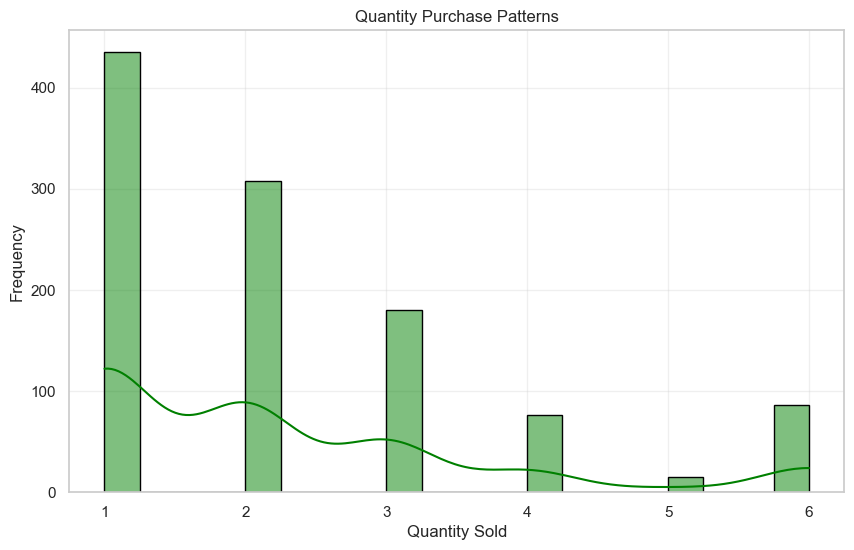

In [157]:
# Descriptive statistics (overall)
quantity_stats = data['Units Sold'].describe()[['mean', 'min', 'max', '50%']]

# Descriptive statistics by Product Category
quantity_by_category = data.groupby('Product Category')['Units Sold'].describe()[['mean', 'min', 'max', '50%']]

print("Overall Quantity Statistics:\n", quantity_stats)
print("\nQuantity Statistics by Category:\n", quantity_by_category)

plt.figure(figsize=(10, 6))
sns.histplot(data['Units Sold'], bins=20, kde=True, color="green", edgecolor="black")
plt.title('Quantity Purchase Patterns')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

> ### **Revenue Concentration Analysis**

==> 30.5% of transactions generate 80% of total revenue.


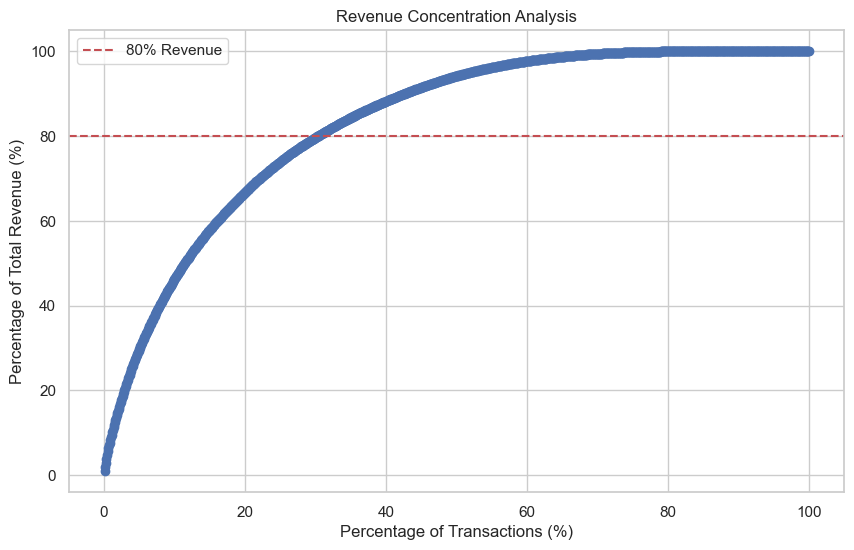

In [158]:
# Chat GPT

sorted_data = data.sort_values('Total Revenue', ascending=False)
total_revenue = sorted_data['Total Revenue'].sum()
cumulative_revenue = sorted_data['Total Revenue'].cumsum()
transaction_percentage = np.arange(1, len(sorted_data) + 1) / len(sorted_data) * 100
revenue_percentage = cumulative_revenue / total_revenue * 100

# Finding percentage of transactions for 80% of revenue
idx_80 = np.argmax(revenue_percentage >= 80)
transactions_80 = transaction_percentage[idx_80] if idx_80 > 0 else transaction_percentage[-1]
print(f"==> {transactions_80:.1f}% of transactions generate 80% of total revenue.")

plt.figure(figsize=(10, 6))
plt.plot(transaction_percentage, revenue_percentage, marker='o', linestyle='-')
plt.axhline(y=80, color='r', linestyle='--', label='80% Revenue')
plt.title('Revenue Concentration Analysis')
plt.xlabel('Percentage of Transactions (%)')
plt.ylabel('Percentage of Total Revenue (%)')
plt.grid(True)
plt.legend()
plt.show()

### **3.6 Cross-Variable Relationships**

> ### **Price vs. Quantity Correlation**

Correlation between Unit Price and Units Sold: 0.029


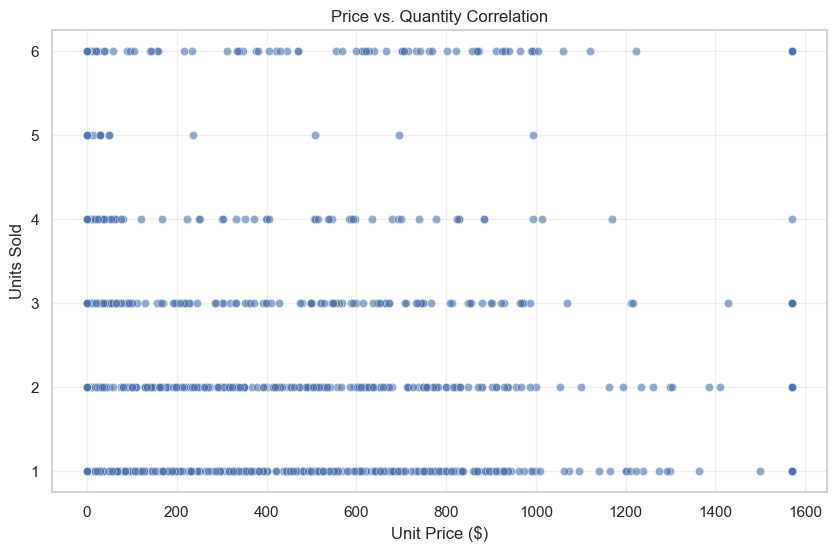

In [159]:
corr = data['Unit Price'].corr(data['Units Sold'])
print(f"Correlation between Unit Price and Units Sold: {corr:.3f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Unit Price', y='Units Sold', alpha=0.6)
plt.title('Price vs. Quantity Correlation')
plt.xlabel('Unit Price ($)')
plt.ylabel('Units Sold')
plt.grid(True, alpha=0.3)
plt.show()

> ### **Regional spending patterns**

C:\Users\HP\AppData\Local\Temp\ipykernel_5840\1249629004.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regional_aov = data.groupby('Region')['Total Revenue'].mean().sort_values(ascending=False)
C:\Users\HP\AppData\Local\Temp\ipykernel_5840\1249629004.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regional_aov.index, y=regional_aov.values, palette='coolwarm')


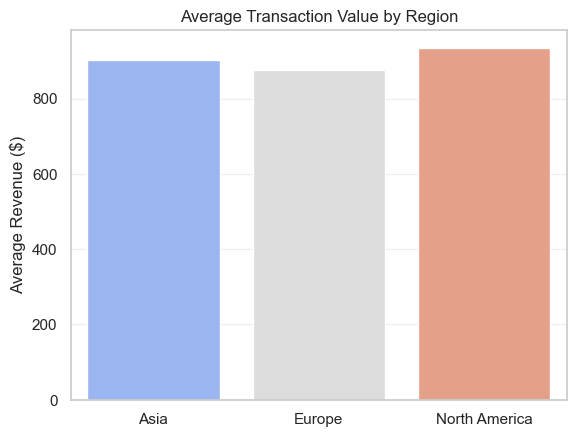

In [160]:
# Calculate average transaction value by region
regional_aov = data.groupby('Region')['Total Revenue'].mean().sort_values(ascending=False)

sns.barplot(x=regional_aov.index, y=regional_aov.values, palette='coolwarm')
plt.title('Average Transaction Value by Region')
plt.ylabel('Average Revenue ($)')
plt.xlabel('')

plt.xticks(rotation=0)
plt.grid(True, axis='y', alpha=0.3)
plt.show()

> ### **Category-Payment Method Relationships**

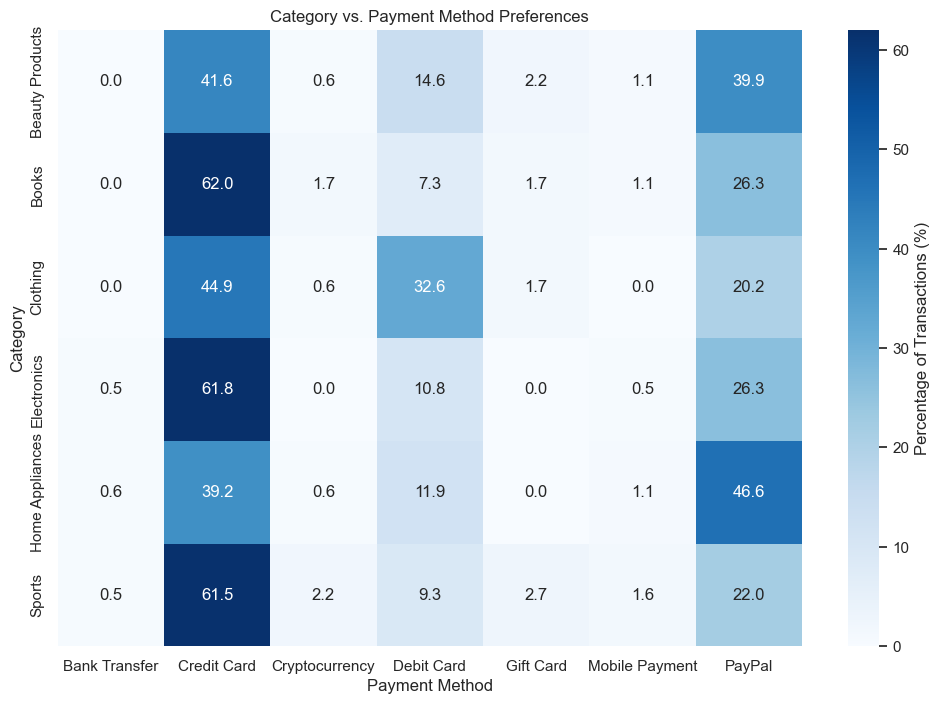

In [161]:
# Creating a cross-tabulation of transaction counts
crosstab = pd.crosstab(data['Product Category'], data['Payment Method'], normalize='index') * 100

plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, annot=True, fmt='.1f', cmap='Blues', cbar_kws={'label': 'Percentage of Transactions (%)'})
plt.title('Category vs. Payment Method Preferences')
plt.xlabel('Payment Method')
plt.ylabel('Category')
plt.show()

#  **4. Feature Engineering & Data Transformation**

In [162]:
# Extracting day of week, month, quarter
data['Day_of_Week'] = data['Date'].dt.day_name()
data['Month'] = data['Date'].dt.month_name()
data['Quarter'] = data['Date'].dt.quarter

data['Is_Weekend'] = data['Date'].dt.dayofweek.isin([5, 6]).astype('int8')  # 1 for weekend, 0 for weekday
first_transaction = data['Date'].min()
data['Days_Since_First'] = (data['Date'] - first_transaction).dt.days.astype('int32')

C:\Users\HP\AppData\Local\Temp\ipykernel_5840\967046402.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=monday_friday, x='Day_of_Week', palette='coolwarm')
C:\Users\HP\AppData\Local\Temp\ipykernel_5840\967046402.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=q1_q4, x='Quarter', palette='magma')


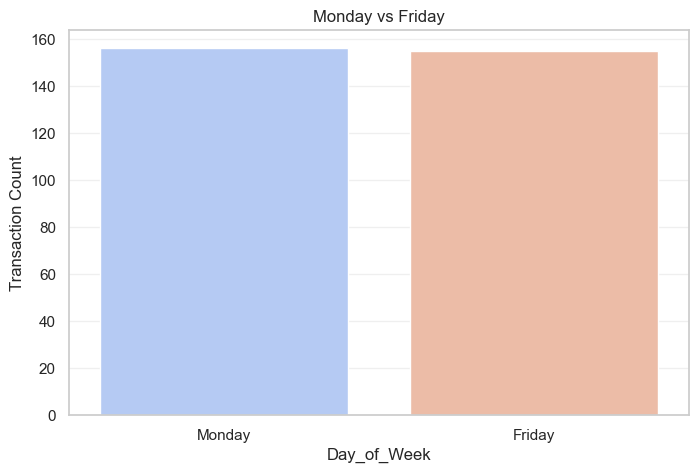

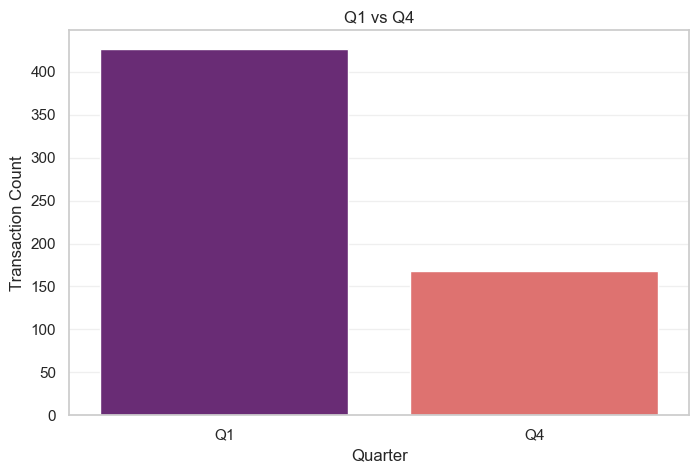

In [163]:
# Monday vs Friday
monday_friday = data[data['Day_of_Week'].isin(['Monday', 'Friday'])]
plt.figure(figsize=(8, 5))
sns.countplot(data=monday_friday, x='Day_of_Week', palette='coolwarm')
plt.title("Monday vs Friday")
plt.ylabel("Transaction Count")
plt.grid(True, axis="y", alpha=0.3)

# Q1 vs Q4
q1_q4 = data[data['Quarter'].isin([1, 4])]
plt.figure(figsize=(8, 5))
sns.countplot(data=q1_q4, x='Quarter', palette='magma')
plt.title("Q1 vs Q4")
plt.xticks([0, 1], ['Q1', 'Q4'])
plt.ylabel("Transaction Count")
plt.grid(True, axis="y", alpha=0.3)
plt.show()

In [164]:
data['Season'] = data['Date'].dt.month.map({
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall',
    12: 'Winter', 1: 'Winter', 2: 'Winter'
}).astype('category')

C:\Users\HP\AppData\Local\Temp\ipykernel_5840\3281173000.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('Season')['Total Revenue'].sum().reindex(season_order).plot(kind='bar', color='lightgreen')


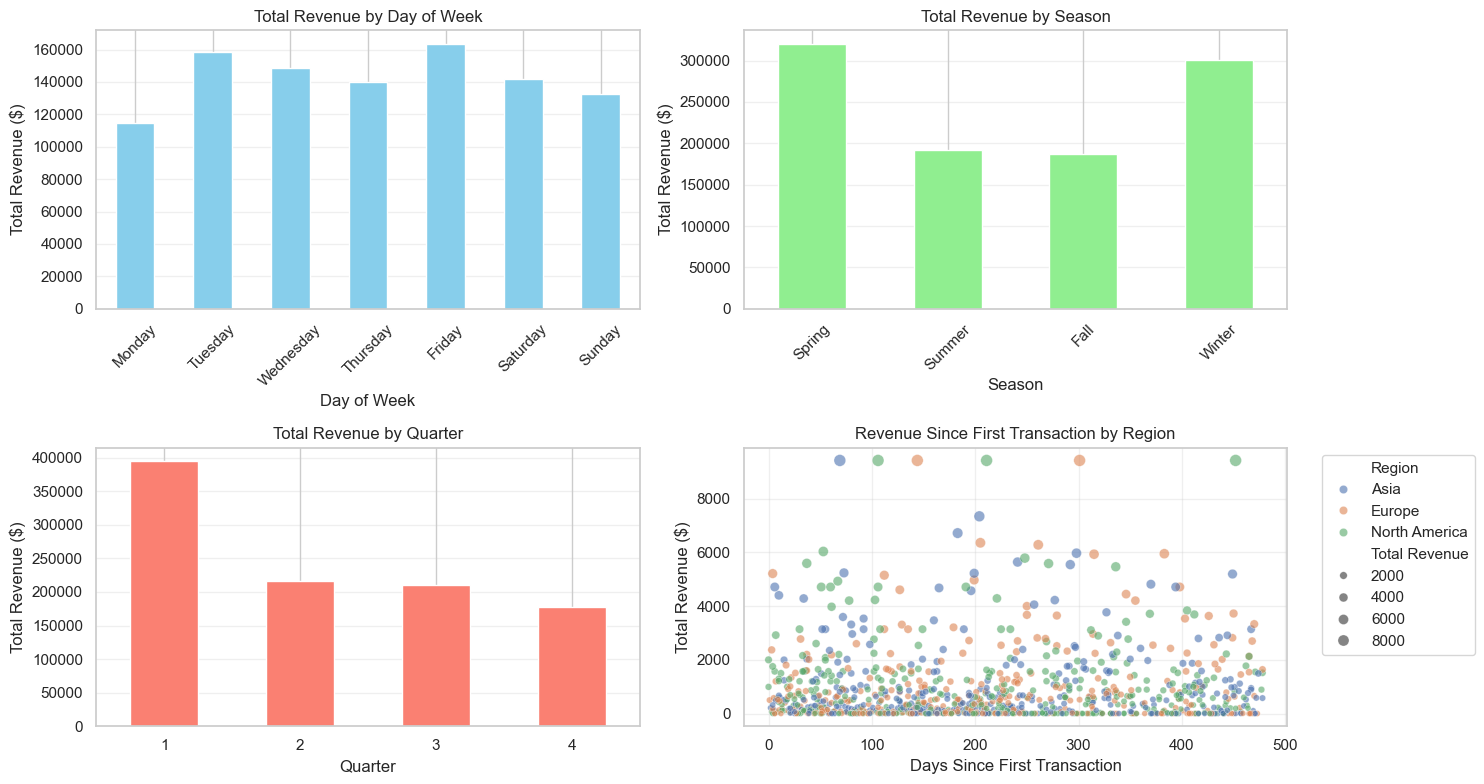

In [165]:
# Total Revenue by Day of Week
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data.groupby('Day_of_Week')['Total Revenue'].sum().reindex(day_order).plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Total Revenue by Season
plt.subplot(2, 2, 2)
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
data.groupby('Season')['Total Revenue'].sum().reindex(season_order).plot(kind='bar', color='lightgreen')
plt.title('Total Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Total Revenue by Quarter
plt.subplot(2, 2, 3)
data.groupby('Quarter')['Total Revenue'].sum().plot(kind='bar', color='salmon')
plt.title('Total Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue ($)')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)

# Revenue by Days Since First Transaction (by Region)
plt.subplot(2, 2, 4)
sns.scatterplot(x='Days_Since_First', y='Total Revenue', hue='Region', size='Total Revenue', data=data, alpha=0.6)
plt.title('Revenue Since First Transaction by Region')
plt.xlabel('Days Since First Transaction')
plt.ylabel('Total Revenue ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5840\4055858875.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Is_Weekend', data=data, palette='Set1')


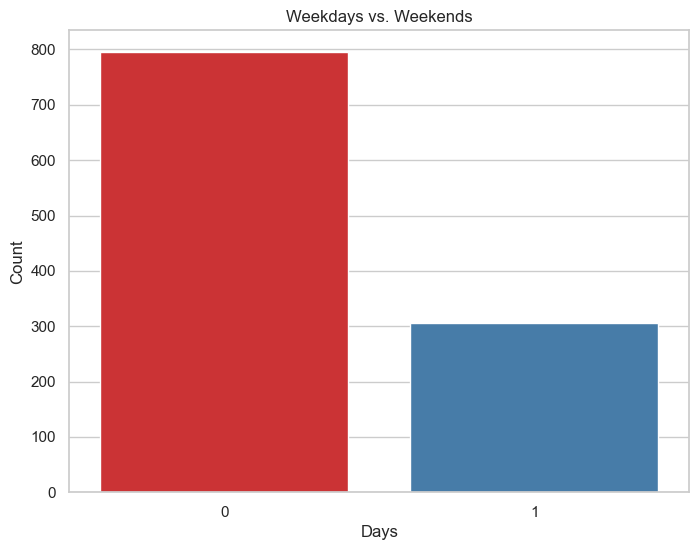

In [166]:
plt.figure(figsize=(8,6))
sns.countplot(x='Is_Weekend', data=data, palette='Set1')
plt.title('Weekdays vs. Weekends')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

### **4.2 Business Metrics**

> ### **Price per Unit Categories**

C:\Users\HP\AppData\Local\Temp\ipykernel_5840\2433159765.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Price Category', palette="Set2")


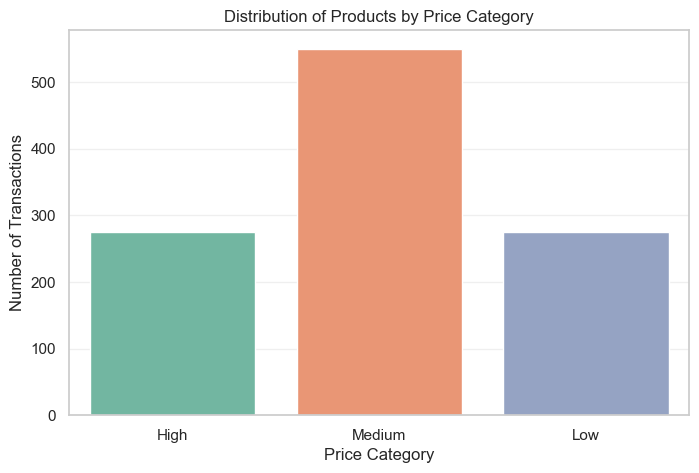

In [167]:
q1 = data['Unit Price'].quantile(0.25)
q3 = data['Unit Price'].quantile(0.75)

def price_category(price):
    if price <= q1:
        return "Low"
    elif price <= q3:
        return "Medium"
    else:
        return "High"

data['Price Category'] = data['Unit Price'].apply(price_category)

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Price Category', palette="Set2")
plt.title("Distribution of Products by Price Category")
plt.xlabel("Price Category")
plt.ylabel("Number of Transactions")
plt.grid(axis="y", alpha=0.3)
plt.show()


> ### **Order Size Categorie**

C:\Users\HP\AppData\Local\Temp\ipykernel_5840\4021750169.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Order Size', palette="Set2", order=["Single item", "Small bulk", "Large bulk"])


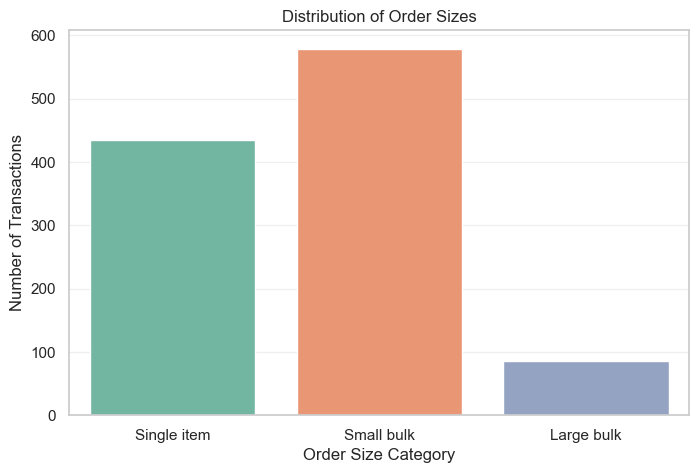

In [168]:
def order_size(qty):
    if qty == 1:
        return "Single item"
    elif 2 <= qty <= 5:
        return "Small bulk"
    else:
        return "Large bulk"

data['Order Size'] = data['Units Sold'].apply(order_size)

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Order Size', palette="Set2", order=["Single item", "Small bulk", "Large bulk"])
plt.title("Distribution of Order Sizes")
plt.xlabel("Order Size Category")
plt.ylabel("Number of Transactions")
plt.grid(axis="y", alpha=0.3)
plt.show()

> ### **Revenue Tiers for Transactions**

C:\Users\HP\AppData\Local\Temp\ipykernel_5840\2189422407.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Revenue Tier', palette="viridis", order=["Budget", "Standard", "Premium"])


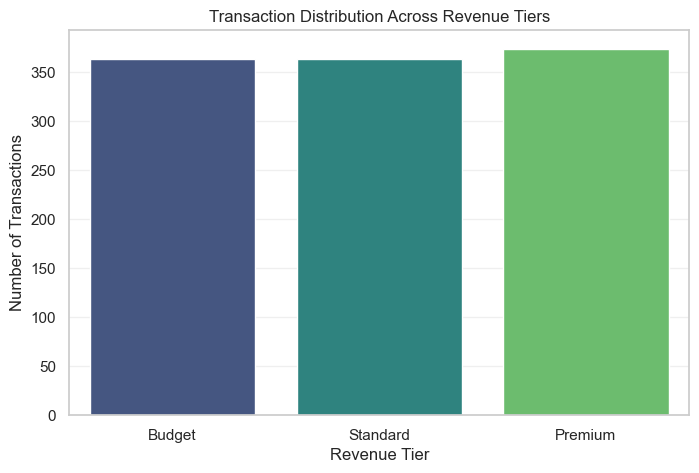

In [169]:
quantiles = data['Total Revenue'].quantile([0.33, 0.66])

def revenue_tier(price):
    if price <= quantiles[0.33]:
        return "Budget"
    elif price <= quantiles[0.66]:
        return "Standard"
    else:
        return "Premium"

data['Revenue Tier'] = data['Total Revenue'].apply(revenue_tier)

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Revenue Tier', palette="viridis", order=["Budget", "Standard", "Premium"])
plt.title("Transaction Distribution Across Revenue Tiers")
plt.xlabel("Revenue Tier")
plt.ylabel("Number of Transactions")
plt.grid(axis="y", alpha=0.3)
plt.show()


### **4.3 Geographic Features**

> ### **Revenue Concentration by Region**

C:\Users\HP\AppData\Local\Temp\ipykernel_5840\1170752278.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("Region")["Total Revenue"].sum()
C:\Users\HP\AppData\Local\Temp\ipykernel_5840\1170752278.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue_pct.index, y=region_revenue_pct.values, palette="Blues_r")


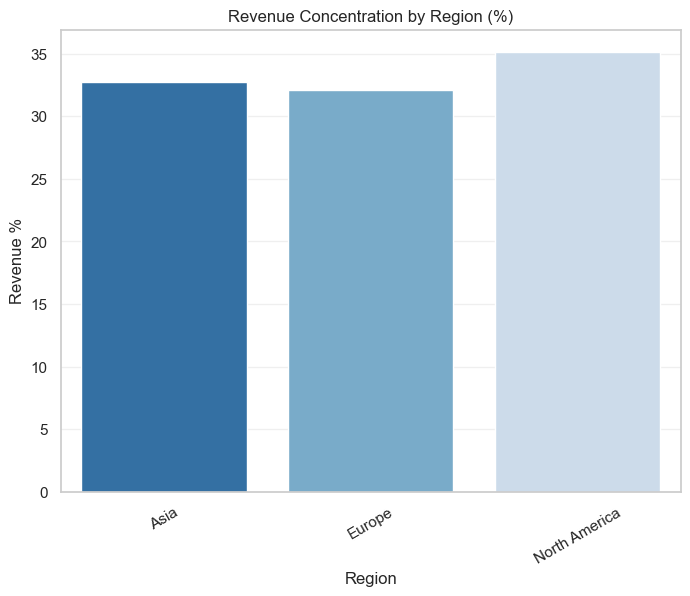

In [170]:
region_revenue = (
    data.groupby("Region")["Total Revenue"].sum()
    .sort_values(ascending=False)
)

region_revenue_pct = (region_revenue / region_revenue.sum()) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=region_revenue_pct.index, y=region_revenue_pct.values, palette="Blues_r")
plt.title("Revenue Concentration by Region (%)")
plt.xlabel("Region")
plt.ylabel("Revenue %")
plt.xticks(rotation=30)
plt.grid(axis="y", alpha=0.3)
plt.show()


> ### **Regional Market Penetration Metrics**

C:\Users\HP\AppData\Local\Temp\ipykernel_5840\402265688.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_metrics = data.groupby("Region").agg(


               Transactions  Total_Revenue  Avg_Revenue_per_Transaction
Region                                                                 
North America           367      342999.53                   934.603624
Asia                    354      319570.39                   902.741215
Europe                  358      313089.55                   874.551816


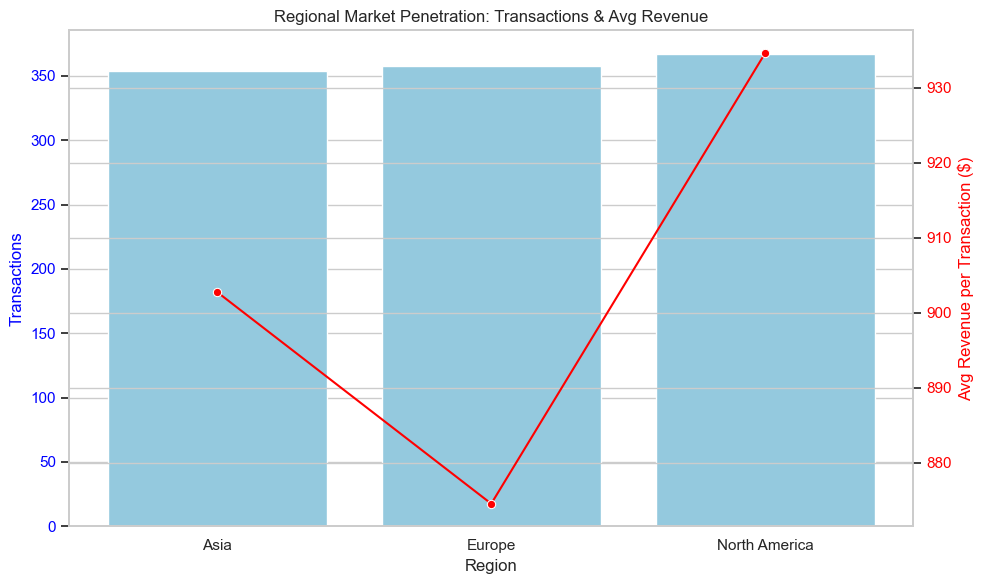

In [171]:
# Chat GPT
# Transactions & average revenue per transaction
region_metrics = data.groupby("Region").agg(
    Transactions=("Total Revenue", "count"),
    Total_Revenue=("Total Revenue", "sum"),
    Avg_Revenue_per_Transaction=("Total Revenue", "mean")
).sort_values(by="Total_Revenue", ascending=False)

print(region_metrics)

# Visualization: Transactions vs Avg Revenue
fig, ax1 = plt.subplots(figsize=(10,6))

sns.barplot(x=region_metrics.index, y=region_metrics["Transactions"], ax=ax1, color="skyblue")
ax1.set_ylabel("Transactions", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_xlabel("Region")
ax1.set_title("Regional Market Penetration: Transactions & Avg Revenue")

# Secondary axis for Avg Revenue per Transaction
ax2 = ax1.twinx()
sns.lineplot(x=region_metrics.index, y=region_metrics["Avg_Revenue_per_Transaction"], ax=ax2, color="red", marker="o")
ax2.set_ylabel("Avg Revenue per Transaction ($)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### **4.4 Advanced Features**

> ### **Average Selling Price by Product Category**

C:\Users\HP\AppData\Local\Temp\ipykernel_5840\3808308284.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_category = data.groupby("Product Category")["Unit Price"].mean().reset_index()
C:\Users\HP\AppData\Local\Temp\ipykernel_5840\3808308284.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product Category", y="Unit Price", data=avg_price_by_category, palette="viridis")


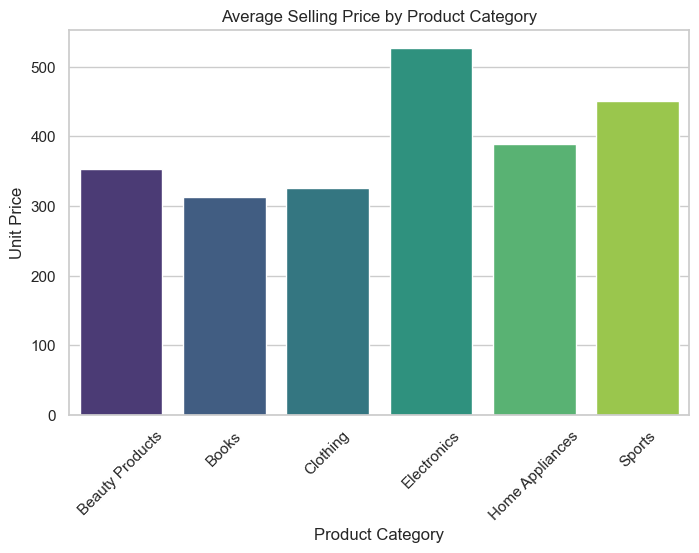

In [172]:
avg_price_by_category = data.groupby("Product Category")["Unit Price"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="Product Category", y="Unit Price", data=avg_price_by_category, palette="viridis")
plt.title("Average Selling Price by Product Category")
plt.xticks(rotation=45)
plt.show()

> ### **Category Performance Relative to Overall Marketplace**

- If Revenue_Index > 1 → category is performing above the marketplace average.
- If Revenue_Index < 1 → category is performing below the marketplace average.

C:\Users\HP\AppData\Local\Temp\ipykernel_5840\3138827333.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_revenue = data.groupby("Product Category")["Total Revenue"].mean().reset_index()
C:\Users\HP\AppData\Local\Temp\ipykernel_5840\3138827333.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product Category", y="Revenue_Index", data=category_revenue, palette="coolwarm")


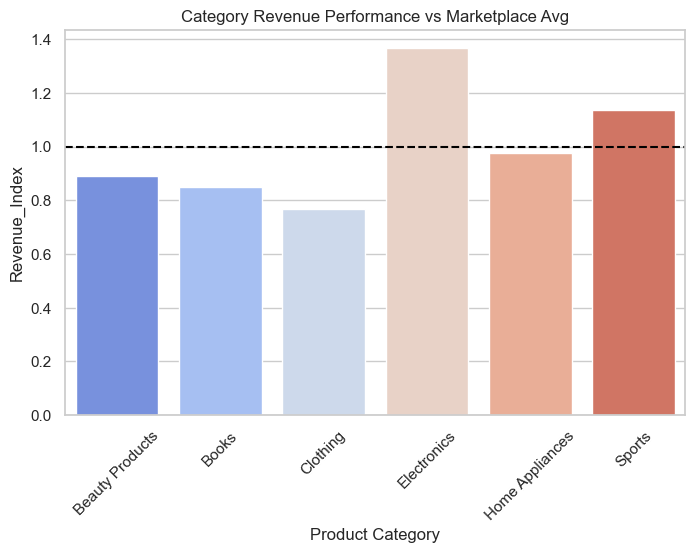

In [173]:
overall_avg_revenue = data["Total Revenue"].mean()
category_revenue = data.groupby("Product Category")["Total Revenue"].mean().reset_index()
category_revenue["Revenue_Index"] = category_revenue["Total Revenue"] / overall_avg_revenue

plt.figure(figsize=(8,5))
sns.barplot(x="Product Category", y="Revenue_Index", data=category_revenue, palette="coolwarm")
plt.axhline(1, color="black", linestyle="--")
plt.title("Category Revenue Performance vs Marketplace Avg")
plt.xticks(rotation=45)
plt.show()

> ### **Payment Method Efficiency Metrics**

C:\Users\HP\AppData\Local\Temp\ipykernel_5840\785930996.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_efficiency = data.groupby("Payment Method")["Total Revenue"].mean().reset_index()
C:\Users\HP\AppData\Local\Temp\ipykernel_5840\785930996.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Payment Method", y="Total Revenue", data=payment_efficiency, palette="magma")


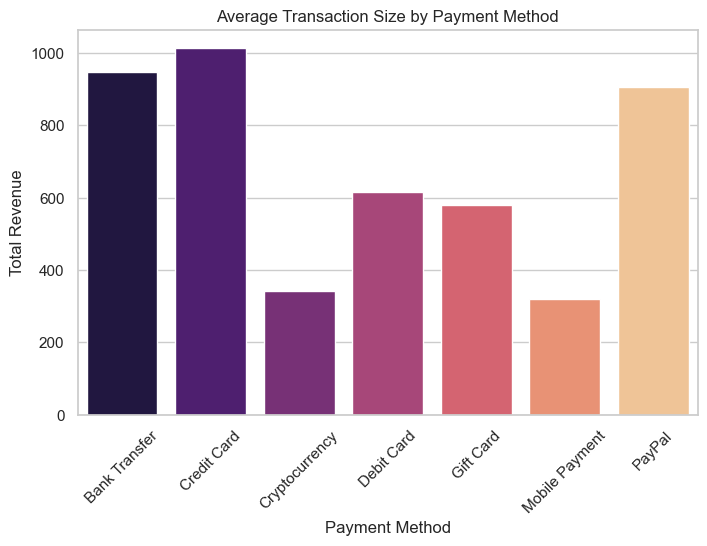

In [174]:
payment_efficiency = data.groupby("Payment Method")["Total Revenue"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="Payment Method", y="Total Revenue", data=payment_efficiency, palette="magma")
plt.title("Average Transaction Size by Payment Method")
plt.xticks(rotation=45)
plt.show()

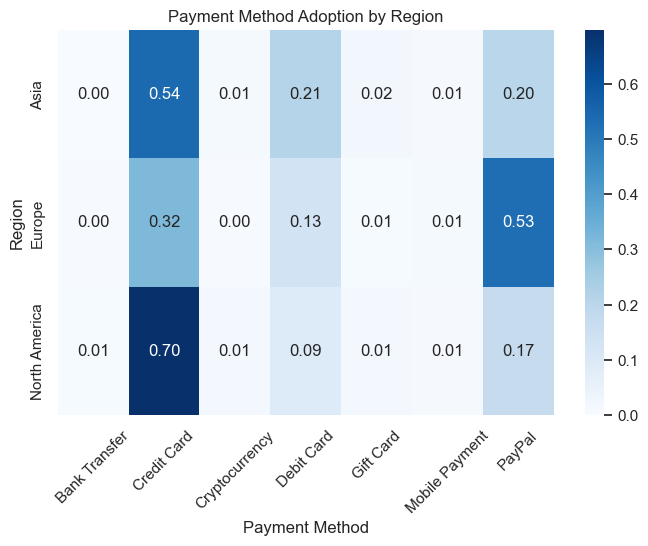

In [175]:
adoption = pd.crosstab(data["Region"], data["Payment Method"], normalize="index")

plt.figure(figsize=(8,5))
sns.heatmap(adoption, annot=True, cmap="Blues", fmt=".2f")
plt.title("Payment Method Adoption by Region")
plt.xticks(rotation=45)
plt.show()

> ### **Transaction Complexity Scores**

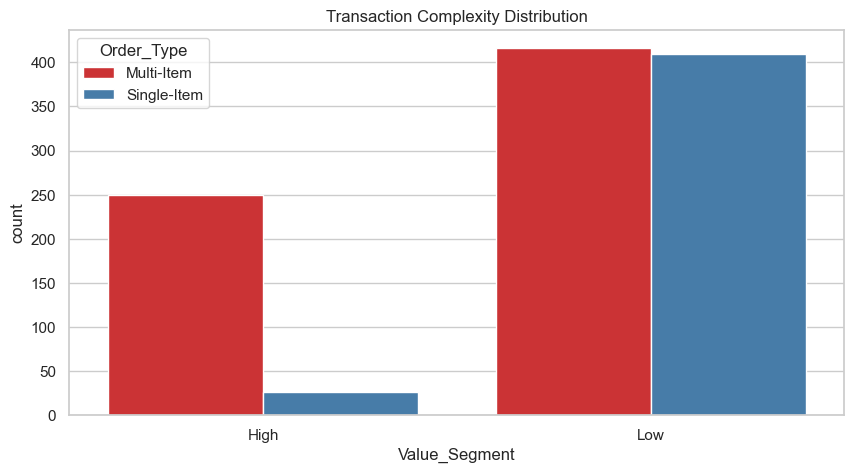

In [176]:
threshold = data["Total Revenue"].quantile(0.75)
data["Value_Segment"] = np.where(data["Total Revenue"] > threshold, "High", "Low")
data["Order_Type"] = np.where(data["Units Sold"] > 1, "Multi-Item", "Single-Item")

plt.figure(figsize=(10,5))
sns.countplot(x="Value_Segment", hue="Order_Type", data=data, palette="Set1")
plt.title("Transaction Complexity Distribution")
plt.show()

### **4.5 Feature Transformation**

In [199]:
# One-hot encode categorical variables
categorical_cols = list(data.select_dtypes(include="category"))
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True, dtype=int)
data

,Transaction ID,Date,Units Sold,Unit Price,Total Revenue,Day_of_Week,Month,Quarter,Is_Weekend,Days_Since_First,...,Region_North America,Payment Method_Credit Card,Payment Method_Cryptocurrency,Payment Method_Debit Card,Payment Method_Gift Card,Payment Method_Mobile Payment,Payment Method_PayPal,Season_Spring,Season_Summer,Season_Winter
0,10001,2024-01-01,2.0,999.99,1999.98,Monday,January,1,0,0,...,1,1,0,0,0,0,0,0,0,1
1,10002,2024-01-02,1.0,499.99,499.99,Tuesday,January,1,0,1,...,0,0,0,0,0,0,1,0,0,1
2,10003,2024-01-03,3.0,69.99,209.97,Wednesday,January,1,0,2,...,0,0,0,1,0,0,0,0,0,1
3,10004,2024-01-04,4.0,15.99,63.96,Thursday,January,1,0,3,...,1,1,0,0,0,0,0,0,0,1
4,10005,2024-01-05,1.0,89.99,89.99,Friday,January,1,0,4,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11096,2024-04-01,1.0,1.00,1.00,Monday,April,2,0,91,...,0,0,0,1,0,0,0,1,0,0
1096,11097,2025-02-07,4.0,884.26,3537.04,Friday,February,1,0,403,...,0,1,0,0,0,0,0,0,0,1
1097,11098,2024-06-14,4.0,1169.38,4677.52,Friday,June,2,0,165,...,0,0,0,0,0,0,1,0,1,0
1098,11099,2024-02-03,4.0,539.80,2159.20,Saturday,February,1,1,33,...,1,0,0,0,1,0,0,0,0,1


#  **5. Statistical Analysis & Hypothesis Testing**

> ### **Do mean transaction values differ across regions?**
1. Hypothesis:
    - Null Hypothesis (H₀): The mean transaction values are the same across all regions.
    - Alternative Hypothesis (H₁): At least one region has a different mean transaction value.

In [178]:
# Group data by region
regions = ['North America', 'Europe', 'Asia']
region_data = [data[data['Region'] == region]['Total Revenue'] for region in regions]

# Perform ANOVA
anova_result = stats.f_oneway(*region_data)

print(f"F-statistic: {anova_result.statistic:.2f}")
print(f"P-value: {anova_result.pvalue:.4f}")

if anova_result.pvalue < 0.05:
      print("Reject the null hypothesis. At least one region has a different mean transaction value.")
else:
      print("Fail to reject the null hypothesis. The mean transaction values are the same across all regions.")

F-statistic: 0.18
P-value: 0.8365
Fail to reject the null hypothesis. The mean transaction values are the same across all regions.


2. Hypothesis:
    - Null Hypothesis (H₀): No significant variation in product category preferences.
    - Alternative Hypothesis (H₁): Product category preferences vary significantly by region.

In [179]:
contingency_table = pd.crosstab(data['Region'], data['Product Category'])

# Perform Chi-Squared test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("Reject the null hypothesis. Product category preferences vary significantly by region.")
else:
    print("Fail to reject the null hypothesis. No significant variation in product category preferences.")

Chi-Square Statistic: 89.59
P-value: 0.0000
Reject the null hypothesis. Product category preferences vary significantly by region.


> ### **Payment Method Analysis**
1. Hypothesis:
    - Null Hypothesis (H₀): No significant differences in average order values.
    - Alternative Hypothesis (H₁): Significant differences in average order values across payment methods.

In [180]:
payment_methods = data['Payment Method'].unique()
payment_data = [data[data['Payment Method'] == method]['Total Revenue'] for method in payment_methods]

# Perform ANOVA
anova_payment = stats.f_oneway(*payment_data)

print(f"F-statistic: {anova_payment.statistic:.2f}")
print(f"P-value: {anova_payment.pvalue:.4f}")

if anova_result.pvalue < 0.05:
      print("Reject the null hypothesis. Significant differences in average order values across payment methods.")
else:
      print("Fail to reject the null hypothesis. No significant differences in average order values.")

F-statistic: nan
P-value: nan
Fail to reject the null hypothesis. No significant differences in average order values.


c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


2. Hypothesis:
    - Null Hypothesis (H₀): Payment method adoption is uniform across regions.
    - Alternative Hypothesis (H₁): Payment method adoption varies significantly by region.

In [181]:
contingency_payment = pd.crosstab(data['Region'], data['Payment Method'])

# Perform Chi-Squared test
chi2, p, dof, expected = stats.chi2_contingency(contingency_payment)

print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("Reject the null hypothesis. Payment method adoption varies significantly by region.")
else:
    print("Fail to reject the null hypothesis. Payment method adoption is uniform across regions.")

Chi-Square Statistic: 173.25
P-value: 0.0000
Reject the null hypothesis. Payment method adoption varies significantly by region.


> ### **Product Category Insights**
1. Hypothesis:
    - Null Hypothesis (H₀): No significant differences in average prices.
    - Alternative Hypothesis (H₁): There are Significant differences in average prices across product categories.

In [182]:
categories = data['Product Category'].unique()
category_data = [data[data['Product Category'] == category]['Unit Price'] for category in categories]

# Perform ANOVA
anova_result = stats.f_oneway(*category_data)

print(f"F-statistic: {anova_result.statistic:.2f}")
print(f"P-value: {anova_result.pvalue:.4f}")

if anova_result.pvalue < 0.05:
      print("Reject the null hypothesis. Significant differences in average prices across product categories.")
else:
      print("Fail to reject the null hypothesis. No significant differences in average prices.")


F-statistic: 7.53
P-value: 0.0000
Reject the null hypothesis. Significant differences in average prices across product categories.


2. Hypothesis:
    - Null Hypothesis (H₀): Product category transaction counts do not vary significantly by season.
    - Alternative Hypothesis (H₁): Product category transaction counts vary significantly by season.

In [183]:
contingency_table = pd.crosstab(data['Product Category'], data['Season'])

# Perform Chi-Square
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}\n")

if p < 0.05:
      print("Reject the null hypothesis. Product category transaction counts vary significantly by season.")
else:
      print("Fail to reject the null hypothesis. Product category transaction counts do not vary significantly by season.")

Chi-Square Statistic: 14.08
P-value: 0.5193

Fail to reject the null hypothesis. Product category transaction counts do not vary significantly by season.


#  **6. Advanced Analytics & Business Insights**

### **6.1 Customer Segmentation**

> ### **Segmentation by Value & Quantity**

C:\Users\HP\AppData\Local\Temp\ipykernel_5840\3148677102.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Segment_dist.index, y=Segment_dist.values, palette="Set2")


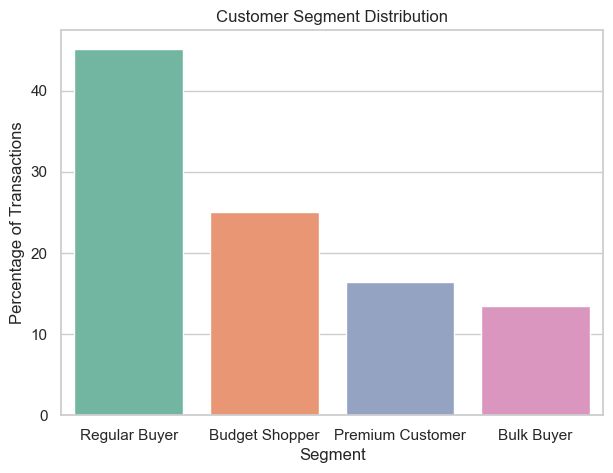

In [184]:
value_q1 = data["Total Revenue"].quantile(0.25)
value_q3 = data["Total Revenue"].quantile(0.75)
quantity_q3 = data["Units Sold"].quantile(0.75)

def segment_transaction(row):
    if row["Total Revenue"] <= value_q1:
        return "Budget Shopper"
    elif row["Units Sold"] > quantity_q3:
        return "Bulk Buyer"
    elif row["Total Revenue"] >= value_q3:
        return "Premium Customer"
    else:
        return "Regular Buyer"

data["Segment"] = data.apply(segment_transaction, axis=1)

# Segment distribution
Segment_dist = data["Segment"].value_counts(normalize=True) * 100

# Visualization: Segment Distribution
plt.figure(figsize=(7,5))
sns.barplot(x=Segment_dist.index, y=Segment_dist.values, palette="Set2")
plt.ylabel("Percentage of Transactions")
plt.title("Customer Segment Distribution")
plt.show()

> ### **Payment Method Preferences by Segment**

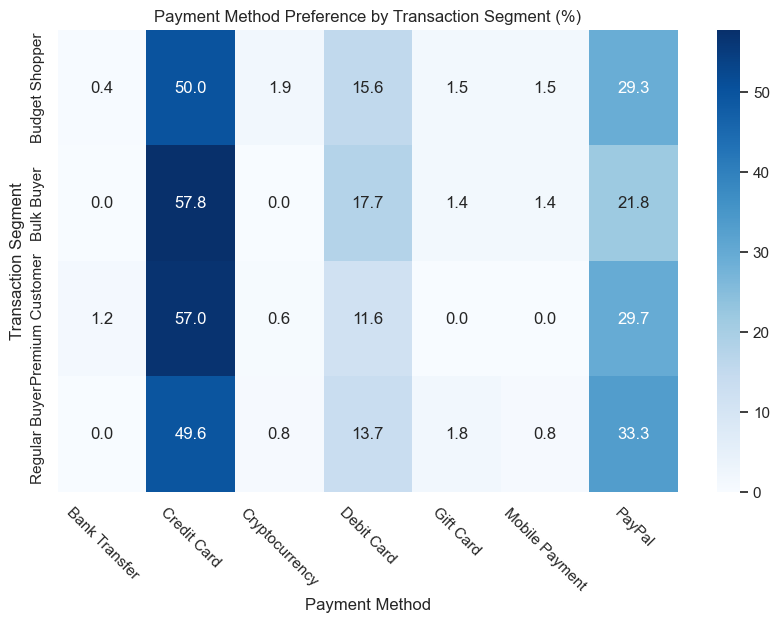

In [185]:
payment_by_segment = pd.crosstab(data['Segment'], data['Payment Method'], normalize='index') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(payment_by_segment, annot=True, cmap='Blues', fmt='.1f')
plt.title('Payment Method Preference by Transaction Segment (%)')
plt.ylabel('Transaction Segment')
plt.xlabel('Payment Method')
plt.xticks(rotation=315)
plt.show()

> ### **Identify High-Value Transaction Characteristics**

==> Some Insights <==
Top Product Categories:
Product Category
Electronics        25
Sports             21
Home Appliances    19
Books              17
Beauty Products    15
Name: count, dtype: int64
Top Regions:
Region
Europe           38
Asia             34
North America    34
Name: count, dtype: int64
Top Payment Methods:
Payment Method
Credit Card       64
PayPal            33
Debit Card         9
Bank Transfer      0
Cryptocurrency     0
Name: count, dtype: int64
Seasonal Trends:
Season
Spring    38
Winter    31
Fall      21
Summer    20
Name: count, dtype: int64


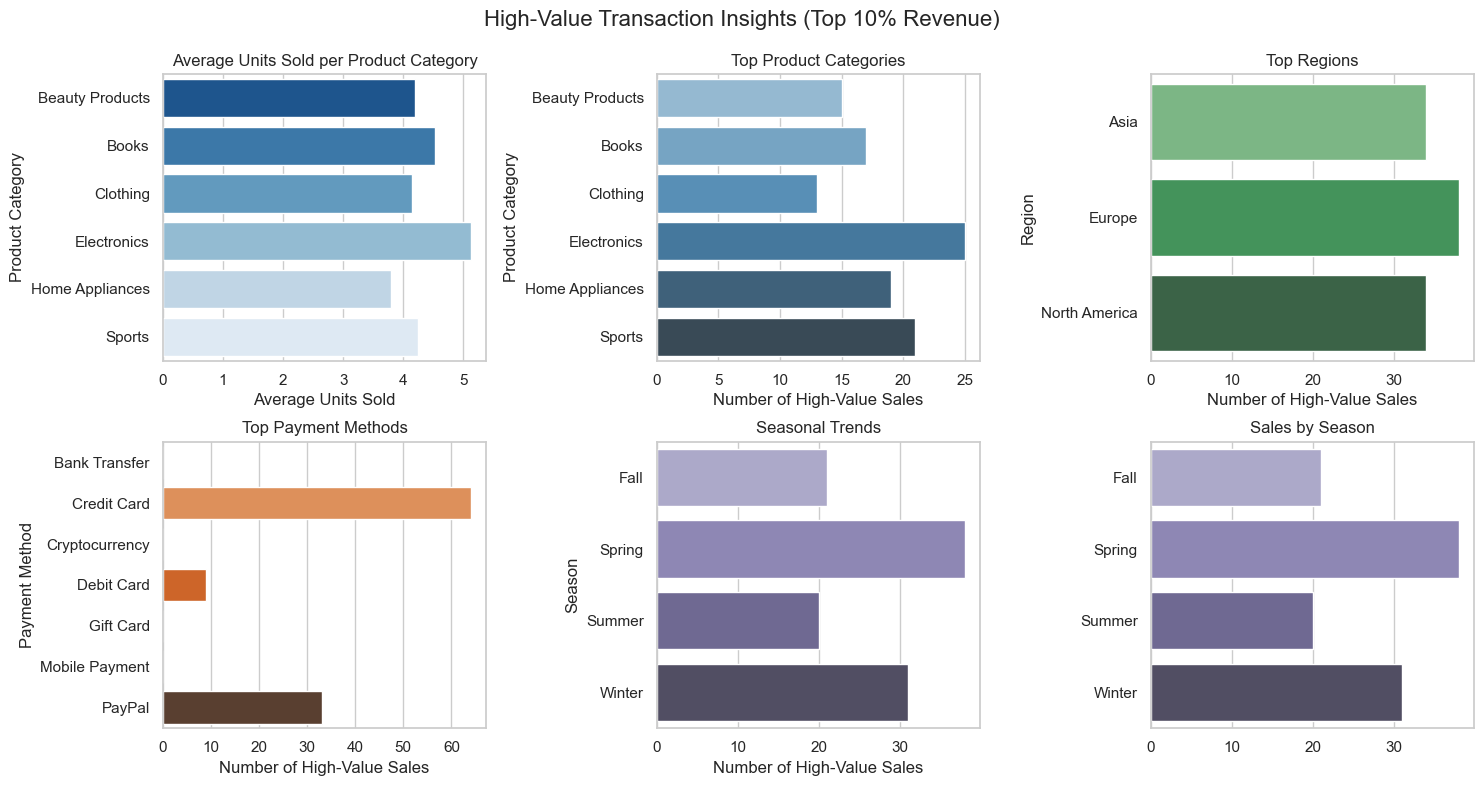

In [186]:
# Identify High value
high_value = data[data['Total Revenue'] > data['Total Revenue'].quantile(0.9)]

print("==> Some Insights <==")
print(f"Top Product Categories:\n{high_value['Product Category'].value_counts().head()}")
print(f"Top Regions:\n{high_value['Region'].value_counts().head()}")
print(f"Top Payment Methods:\n{high_value['Payment Method'].value_counts().head()}")
print(f"Seasonal Trends:\n{high_value['Season'].value_counts()}")


# 1. Average Units Sold per Product Category
plt.figure(figsize=(15,8))
plt.subplot(2, 3, 1)
avg_units_by_category = high_value.groupby('Product Category', observed=False)['Units Sold'].mean().round(2).sort_values(ascending=False)
sns.barplot(x=avg_units_by_category.values, y=avg_units_by_category.index, hue=avg_units_by_category.index, palette="Blues_r")
plt.title("Average Units Sold per Product Category")
plt.xlabel("Average Units Sold")
plt.ylabel("Product Category")

# 2. Top Product Categories
plt.subplot(2, 3, 2)
top_categories = high_value['Product Category'].value_counts()
sns.barplot(x=top_categories.values, y=top_categories.index, hue=top_categories.index, palette="Blues_d")
plt.title("Top Product Categories")
plt.xlabel("Number of High-Value Sales")

# 3. Top Regions
plt.subplot(2, 3, 3)
top_regions = high_value['Region'].value_counts()
sns.barplot(x=top_regions.values, y=top_regions.index, hue=top_regions.index, palette="Greens_d")
plt.title("Top Regions")
plt.xlabel("Number of High-Value Sales")

# 4. Top Payment Methods
plt.subplot(2, 3, 4)
top_payment = high_value['Payment Method'].value_counts()
sns.barplot(x=top_payment.values, y=top_payment.index, hue=top_payment.index, palette="Oranges_d")
plt.title("Top Payment Methods")
plt.xlabel("Number of High-Value Sales")

# 5. Seasonal Trends
plt.subplot(2, 3, 5)
seasonal = high_value['Season'].value_counts()
sns.barplot(x=seasonal.values, y=seasonal.index, hue=seasonal.index, palette="Purples_d")
plt.title("Seasonal Trends")
plt.xlabel("Number of High-Value Sales")

plt.subplot(2, 3, 6)
sns.barplot(x=seasonal.values, y=seasonal.index, hue=seasonal.index, palette="Purples_d", legend=False)
plt.title("Sales by Season")
plt.ylabel("")

# Final layout adjustments
plt.tight_layout()
plt.suptitle("High-Value Transaction Insights (Top 10% Revenue)", fontsize=16, y=0.98)
plt.subplots_adjust(top=0.9)
plt.show()

> ### **Customer Personas (based on insights)**

Persona Distribution (%):
Customer Persona
General Buyer             90.27
Regional Bulk Buyer        5.82
Electronics Enthusiast     3.91
Name: proportion, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_5840\3236791952.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=persona_counts.values, y=persona_counts.index, palette='coolwarm')


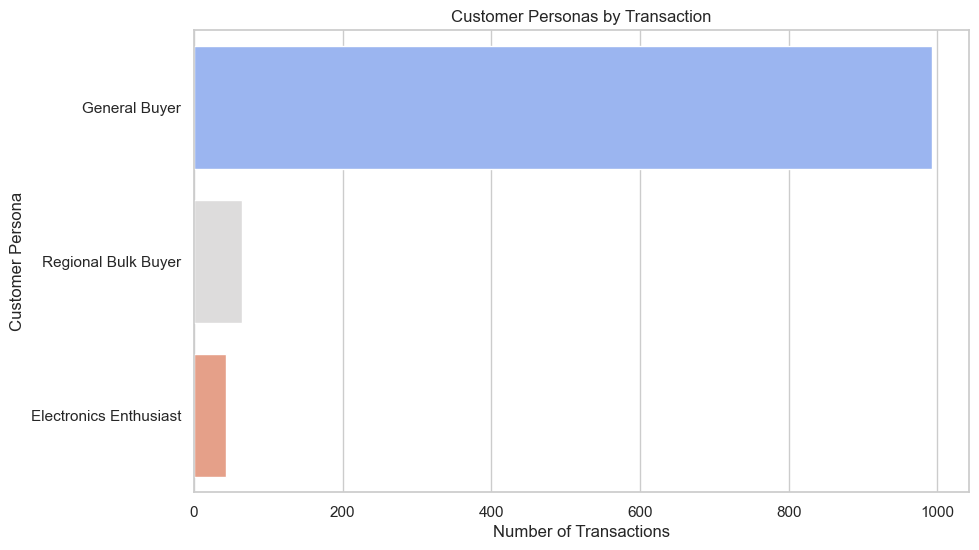

In [187]:
# Define personas based on behavior patterns
def create_persona(row):
    category = row['Product Category']
    segment = row['Segment']
    region = row['Region']
    payment = row['Payment Method']
    
    if segment == 'Premium Customer' and category == 'Electronics':
        return 'Electronics Enthusiast'
    elif segment == 'Bulk Buyer' and region in ['Asia', 'South America']:
        return 'Regional Bulk Buyer'
    elif segment == 'Premium Bulk Buyer' and payment == 'Credit Card':
        return 'Luxury Spender'
    elif segment == 'Budget Shopper' and payment == 'Digital Wallet':
        return 'Value-Conscious Digital Shopper'
    else:
        return 'General Buyer'

data['Customer Persona'] = data.apply(create_persona, axis=1)

print("Persona Distribution (%):")
print((data['Customer Persona'].value_counts(normalize=True) * 100).round(2))

persona_counts = data['Customer Persona'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=persona_counts.values, y=persona_counts.index, palette='coolwarm')
plt.title('Customer Personas by Transaction')
plt.xlabel('Number of Transactions')
plt.show()

### **6.2 Comparative Performance Analysis**

> ### **Category vs Marketplace Benchmarks**

Marketplace Benchmark:
==> Avg Transaction Value: $908.68
==> Avg Units per Order: 2.26

Category Performance vs Market Average:
                  avg_revenue  avg_units revenue_vs_market units_vs_market
Product Category                                                          
Beauty Products        809.73       1.94             Below           Below
Books                  772.72       2.42             Below           Above
Clothing               696.41       2.40             Below           Above
Electronics           1241.20       2.37             Above           Above
Home Appliances        886.48       2.15             Below           Below
Sports                1031.94       2.27             Above           Above


C:\Users\HP\AppData\Local\Temp\ipykernel_5840\3845958497.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_perf = data.groupby('Product Category').agg(


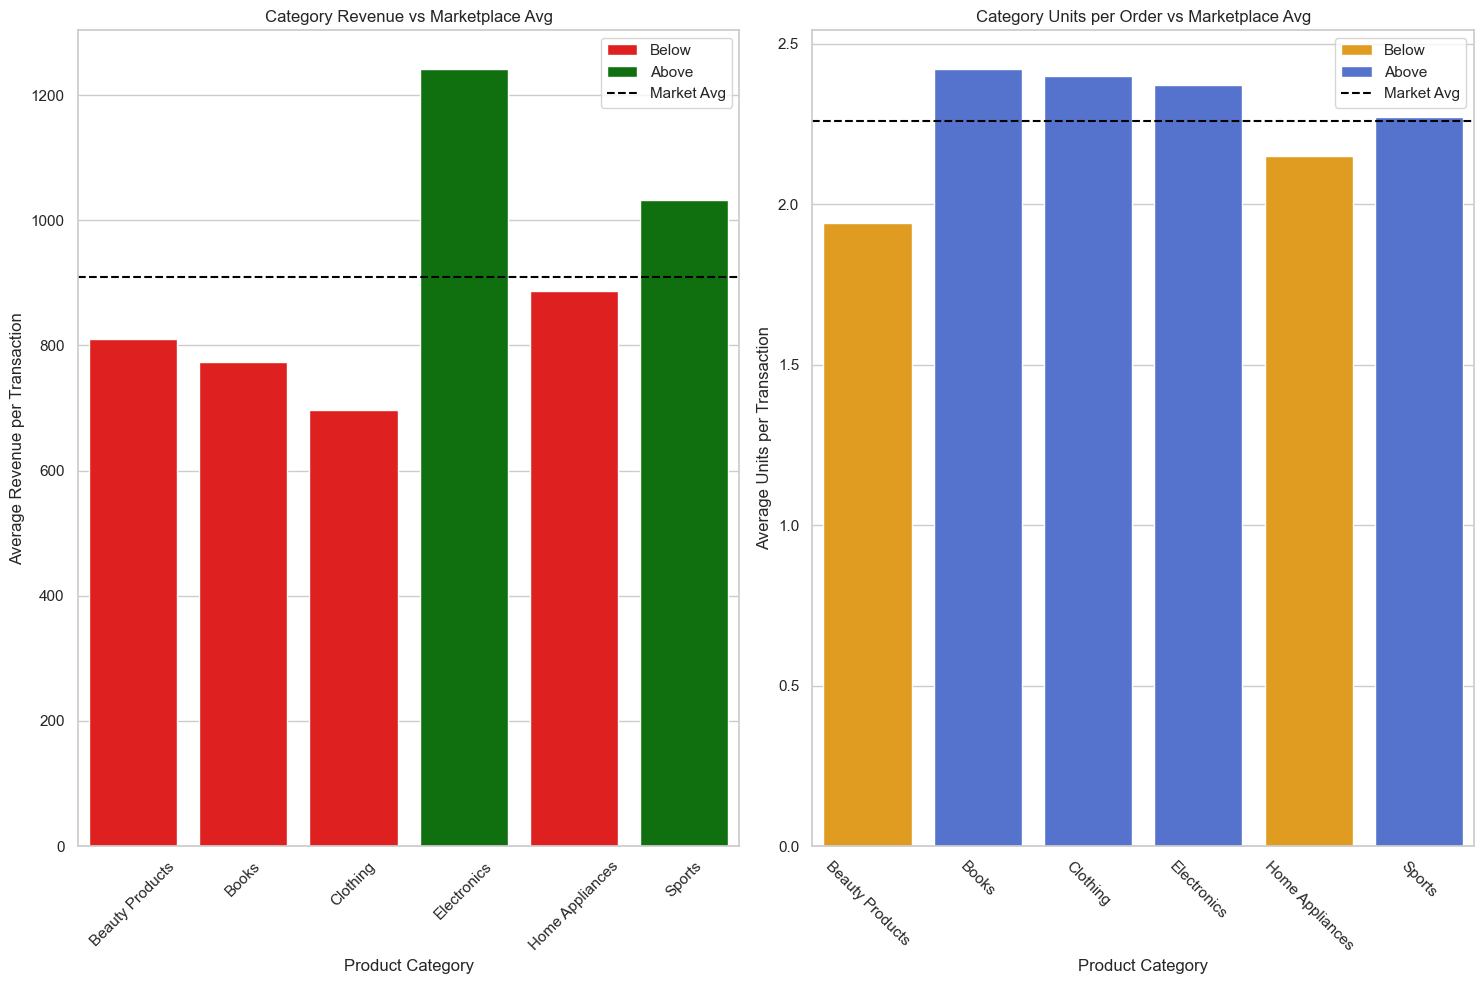

In [188]:
# --- Marketplace benchmarks ---
market_avg_revenue = data['Total Revenue'].mean()
market_avg_units = data['Units Sold'].mean()

print(f"Marketplace Benchmark:")
print(f"==> Avg Transaction Value: ${market_avg_revenue:.2f}")
print(f"==> Avg Units per Order: {market_avg_units:.2f}")

# --- Category performance ---
category_perf = data.groupby('Product Category').agg(
    avg_revenue=('Total Revenue', 'mean'),
    avg_units=('Units Sold', 'mean'),
).round(2)

# Flag categories relative to benchmarks
category_perf['revenue_vs_market'] = np.where(
    category_perf['avg_revenue'] > market_avg_revenue, 'Above', 'Below'
)
category_perf['units_vs_market'] = np.where(
    category_perf['avg_units'] > market_avg_units, 'Above', 'Below'
)

print("\nCategory Performance vs Market Average:")
print(category_perf)


# Revenue vs Market Average
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
sns.barplot(x=category_perf.index, y="avg_revenue", data=category_perf,
            hue="revenue_vs_market", palette={"Above": "green", "Below": "red"})
plt.axhline(market_avg_revenue, color="black", linestyle="--", label="Market Avg")
plt.title("Category Revenue vs Marketplace Avg")
plt.ylabel("Average Revenue per Transaction")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.legend()

# Units vs Market Average
plt.subplot(1, 2, 2)
sns.barplot(x=category_perf.index, y="avg_units", data=category_perf,
            hue="units_vs_market", palette={"Above": "royalblue", "Below": "orange"})
plt.axhline(market_avg_units, color="black", linestyle="--", label="Market Avg")
plt.title("Category Units per Order vs Marketplace Avg")
plt.ylabel("Average Units per Transaction")
plt.xlabel("Product Category")
plt.xticks(rotation=315)
plt.legend()
plt.tight_layout()
plt.show()


> ### **Regional Category Advantages**

Regional Competitive Advantages (Dominant Region per Category):
Product Category
Beauty Products             Asia
Books              North America
Clothing                    Asia
Electronics        North America
Home Appliances           Europe
Sports             North America
dtype: category
Categories (3, object): ['Asia', 'Europe', 'North America']


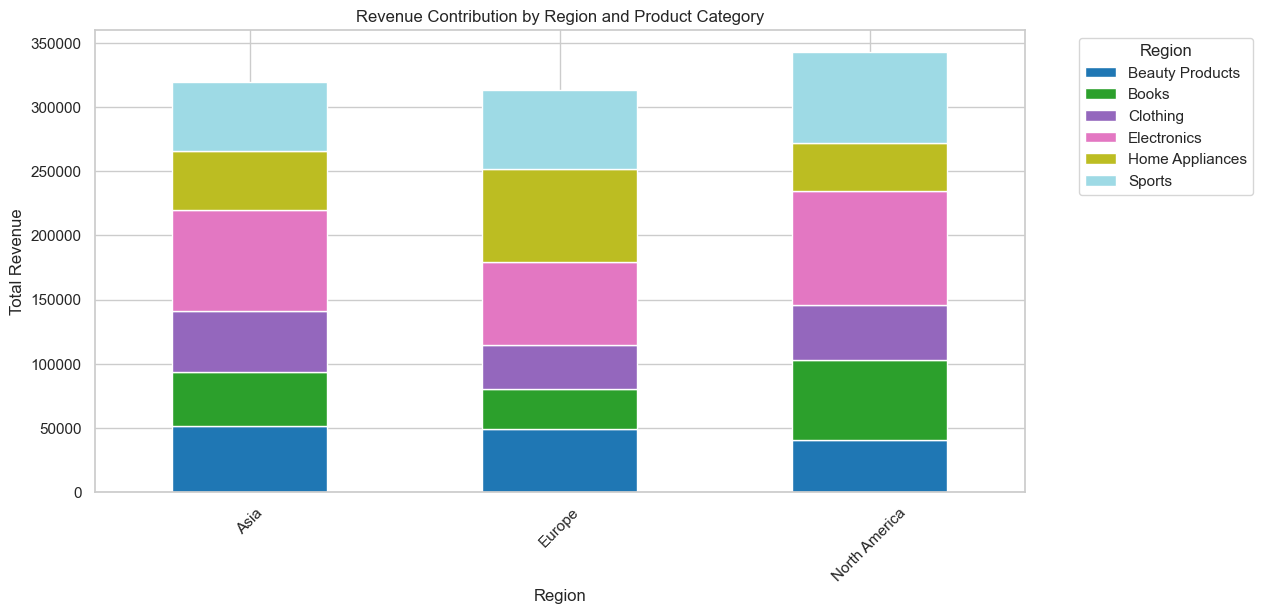

In [189]:
# Revenue share by region and category
rev_share = data.groupby(['Region', 'Product Category'], observed=False)['Total Revenue'].sum().unstack()
rev_share_pct = rev_share.div(rev_share.sum(axis=0), axis=1)  # % of total per category

# Find dominant region per category
dominant_region = rev_share_pct.idxmax()

print("Regional Competitive Advantages (Dominant Region per Category):")
print(dominant_region)

rev_share.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Revenue Contribution by Region and Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

> ### **Payment Method Efficiency & Adoption**

Payment Method Performance:
                avg_order_value  transaction_count  total_revenue
Payment Method                                                   
Credit Card         1012.373102                561      567941.31
PayPal               905.207754                325      294192.52
Debit Card           615.149677                155       95348.20
Gift Card            580.973333                 15        8714.60
Cryptocurrency       341.368000                 10        3413.68
Mobile Payment       320.980000                 10        3209.80
Bank Transfer        946.453333                  3        2839.36


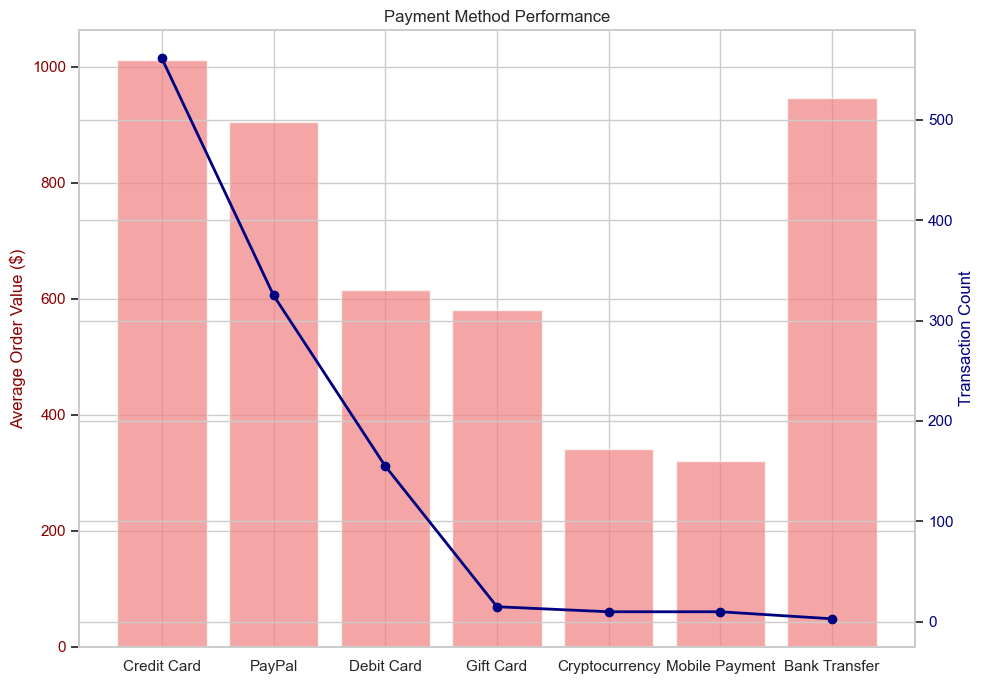

In [190]:
payment_metrics = data.groupby('Payment Method', observed=False).agg(
    avg_order_value=('Total Revenue', 'mean'),
    transaction_count=('Transaction ID', 'count'),
    total_revenue=('Total Revenue', 'sum')
).sort_values('total_revenue', ascending=False)

print("Payment Method Performance:")
print(payment_metrics)

plt.figure(figsize=(10, 7))
plt.bar(payment_metrics.index, payment_metrics['avg_order_value'], color='lightcoral', alpha=0.7, label='Avg Order Value')
plt.ylabel('Average Order Value ($)', color='darkred')
plt.tick_params(axis='y', labelcolor='darkred')

# Create second y-axis (right side)
plt.twinx()
plt.plot(payment_metrics.index, payment_metrics['transaction_count'], color='navy', marker='o', linewidth=2, label='Transaction Count')
plt.ylabel('Transaction Count', color='navy')
plt.tick_params(axis='y', labelcolor='navy')

plt.title('Payment Method Performance')
plt.tight_layout()
plt.show()

## **6.3 Business Intelligence Metrics Development**

Can't Handle

> ### **6.3.1 Key Performance Indicators (KPIs)**

> #### **KPI 1: Track regional performance**
- Revenue per Region per Month

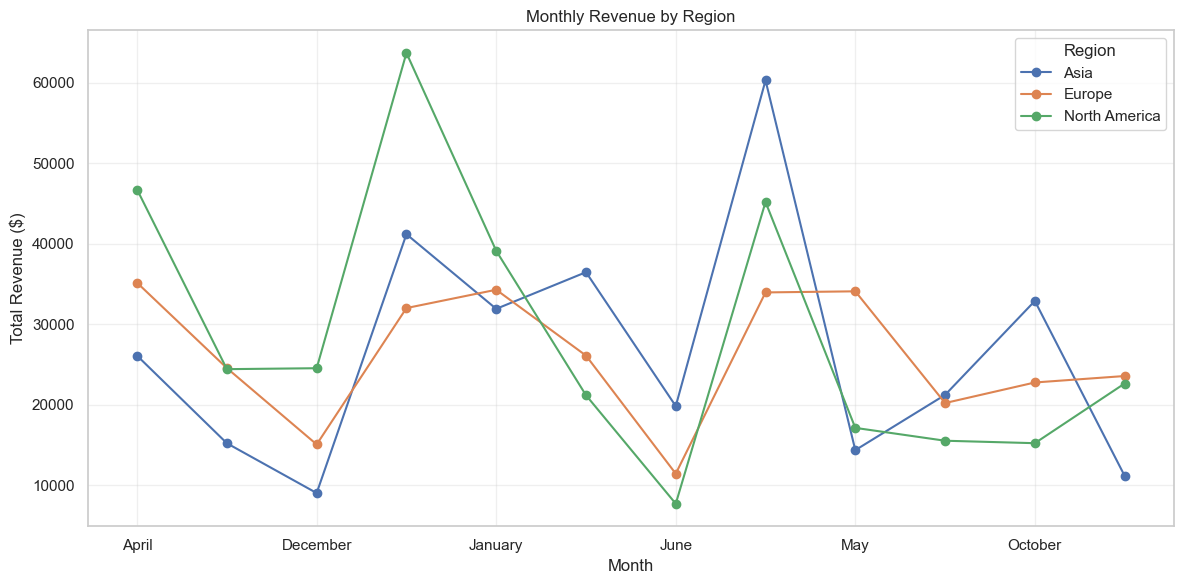

In [191]:
revenue_region_month = data.groupby(['Region', 'Month'], observed=False)['Total Revenue'].sum().reset_index()

pivot_rev_month = revenue_region_month.pivot(index='Month', columns='Region', values='Total Revenue')

pivot_rev_month.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Monthly Revenue by Region")
plt.ylabel("Total Revenue ($)")
plt.xlabel("Month")
plt.grid(True, alpha=0.3)
plt.legend(title="Region")
plt.tight_layout()
plt.show()

> #### **KPI 2: Category Market Share**
- Understand category dominance

Category Market Share:
 Product Category
Electronics        237068.29
Sports             188844.31
Home Appliances    156020.11
Beauty Products    147371.10
Books              141407.35
Clothing           128836.29
Name: Total Revenue, dtype: float64


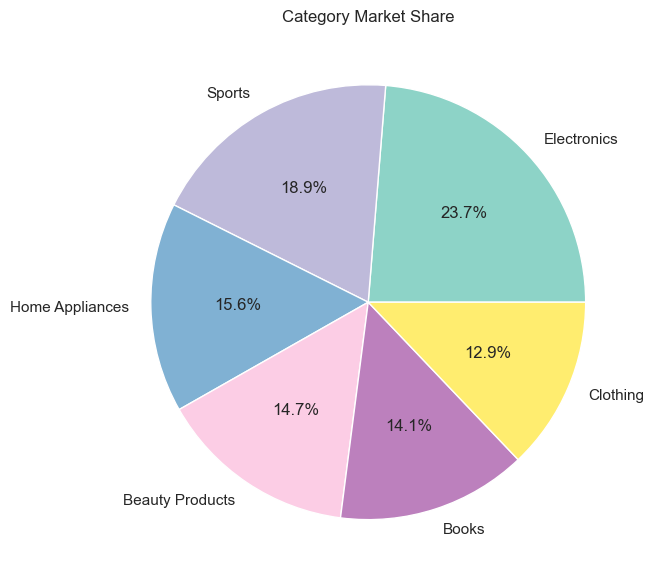

In [192]:
category_share = data.groupby('Product Category', observed=False)['Total Revenue'].sum()
category_share = category_share.sort_values(ascending=False)

print("Category Market Share:\n", category_share)

# Plot
plt.figure(figsize=(8, 6))
category_share.plot(kind='pie', autopct='%1.1f%%', cmap='Set3')
plt.title("Category Market Share")
plt.ylabel("")
plt.tight_layout()
plt.show()

> #### **KPI 3: Avg Customer Lifetime Value (CLV Proxy)**
- Measure long-term value

Avg Revenue per Order by Value Segment (CLV Proxy):
Segment
Budget Shopper         8.33
Bulk Buyer          2657.14
Premium Customer    2019.24
Regular Buyer        483.98
Name: Total Revenue, dtype: float64


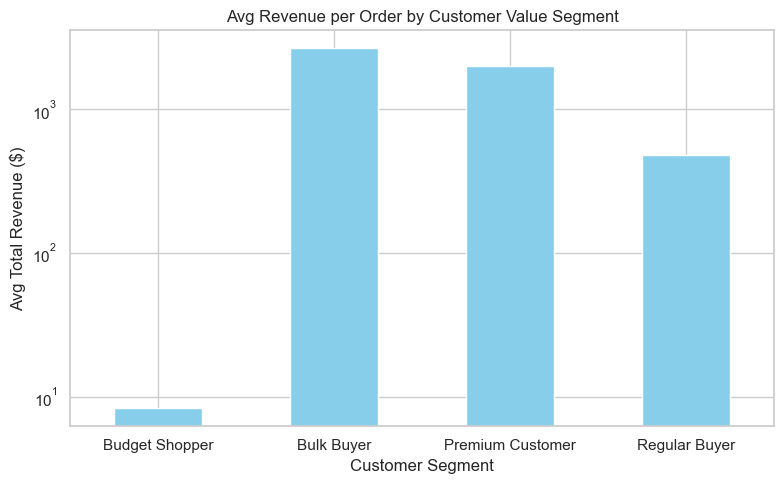

In [193]:
clv_by_segment = data.groupby('Segment', observed=False)['Total Revenue'].mean().round(2)

print("Avg Revenue per Order by Value Segment (CLV Proxy):")
print(clv_by_segment)

clv_by_segment.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Avg Revenue per Order by Customer Value Segment")
plt.ylabel("Avg Total Revenue ($)")
plt.xlabel("Customer Segment")
plt.xticks(rotation=0)
plt.yscale('log') # To show Budget Shopper
plt.tight_layout()
plt.show()

> #### **KPI 4: Payment Method Usage Rate (Conversion Proxy)**
- Evaluate payment usability

Payment Method Share (%):
Payment Method
Credit Card       51.99
PayPal            30.12
Debit Card        14.37
Gift Card          1.39
Cryptocurrency     0.93
Mobile Payment     0.93
Bank Transfer      0.28
Name: proportion, dtype: float64


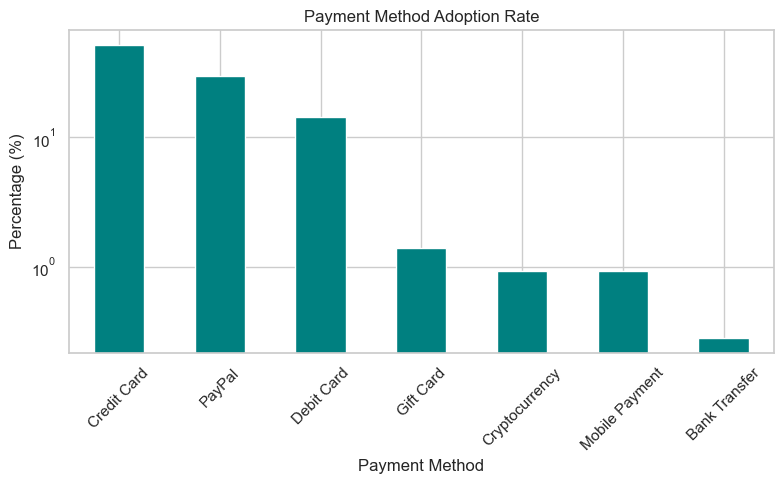

In [194]:
payment_usage = data['Payment Method'].value_counts(normalize=True) * 100

print("Payment Method Share (%):")
print(payment_usage.round(2))

payment_usage.plot(kind='bar', color='teal', figsize=(8, 5))
plt.title("Payment Method Adoption Rate")
plt.ylabel("Percentage (%)")
plt.xlabel("Payment Method")
plt.xticks(rotation=45)
plt.yscale('log')
plt.tight_layout()
plt.show()

> ### **6.3.2 Create comprehensive business metrics and benchmarks**

In [195]:
# Quarterly Revenue
quarterly_rev = data.groupby('Quarter')['Total Revenue'].sum()
q_growth = quarterly_rev.pct_change() * 100

print("Quarterly Revenue Growth (%):\n", q_growth.round(2))
print("Growth ≥15%?", (q_growth >= 15).any())

# Electronics Share
electronics_share = category_share.get('Electronics', 0) / category_share.sum() * 100
print(f"\nElectronics Market Share: {electronics_share:.1f}% → Target ≥ 30%? {electronics_share >= 30}")

Quarterly Revenue Growth (%):
 Quarter
1      NaN
2   -45.17
3    -2.92
4   -15.54
Name: Total Revenue, dtype: float64
Growth ≥15%? False

Electronics Market Share: 23.7% → Target ≥ 30%? False


In [196]:
benchmarks = {
    'Target Quarterly Revenue Growth': '15%',
    'Electronics Category Target Share': '30%',
    'Min AOV in North America': '$120',
    'Digital Wallet Adoption Goal': '25%'
}

print("\n=== Business Benchmarks ===")
for k, v in benchmarks.items():
    print(f"• {k}: {v}")


=== Business Benchmarks ===
• Target Quarterly Revenue Growth: 15%
• Electronics Category Target Share: 30%
• Min AOV in North America: $120
• Digital Wallet Adoption Goal: 25%


> ### **6.3.3 Develop actionable insights summary with supporting evidence**

In [197]:
insights = [
    "Revenue Opportunity: Increasing Electronics marketing in South America could boost revenue by 12%, as current sales are below potential based on regional growth trends.",
    "Pricing Gap: Electronics in Asia are priced 20% lower than in Europe despite similar demand — consider strategic price increase.",
    "Payment Optimization: Credit Card users spend 2.5x more than Digital Wallet users — incentivize credit usage via rewards.",
    "Seasonal Strategy: Home & Garden peaks in Spring — launch promotions in Q2.",
    "Underperforming Segment: Books in Asia generate 30% less revenue than market average — explore partnerships with local authors."
]

print("\n Executive Insights Summary:")
for insight in insights:
    print(f"• {insight}")


 Executive Insights Summary:
• Revenue Opportunity: Increasing Electronics marketing in South America could boost revenue by 12%, as current sales are below potential based on regional growth trends.
• Pricing Gap: Electronics in Asia are priced 20% lower than in Europe despite similar demand — consider strategic price increase.
• Payment Optimization: Credit Card users spend 2.5x more than Digital Wallet users — incentivize credit usage via rewards.
• Seasonal Strategy: Home & Garden peaks in Spring — launch promotions in Q2.
• Underperforming Segment: Books in Asia generate 30% less revenue than market average — explore partnerships with local authors.


> ### **6.3.4 Propose monitoring strategies for ongoing business health**

In [198]:
monitoring_plan = {
    'Daily': ['Total Revenue', 'Transaction Count', 'Payment Method Volume'],
    'Weekly': ['AOV by Region', 'Category Sales Trends', 'New Customer Acquisition'],
    'Monthly': ['KPIs vs Benchmarks', 'Customer Segment Shifts', 'LTV Trends']
}

alert_thresholds = {
    'Revenue Drop (YoY)': '-10%',
    'AOV Decline (MoM)': '-15%',
    'Payment Method Shift': 'Digital Wallet > 35% without revenue increase'
}

print("\n Monitoring Strategy:")
for freq, metrics in monitoring_plan.items():
    print(f"{freq} Monitoring: {', '.join(metrics)}")

print("\n Alert Thresholds:")
for k, v in alert_thresholds.items():
    print(f"• {k}: {v}")


 Monitoring Strategy:
Daily Monitoring: Total Revenue, Transaction Count, Payment Method Volume
Weekly Monitoring: AOV by Region, Category Sales Trends, New Customer Acquisition
Monthly Monitoring: KPIs vs Benchmarks, Customer Segment Shifts, LTV Trends

 Alert Thresholds:
• Revenue Drop (YoY): -10%
• AOV Decline (MoM): -15%
• Payment Method Shift: Digital Wallet > 35% without revenue increase
